# Maryland State Parks Twitter Purge

According to [this article](https://www.baltimoresun.com/news/maryland/investigations/bs-md-state-park-social-media-accounts-merging-20190109-story.html) in the Baltimore Sun the Maryland Park Service has decided to consolidate all the individual state park social media accounts, including Twitter. This would effectively remove the historical record of feeds that people have followed. Let's use [twarc](https://github.com/docnow/twarc) to determine where these accounts are, and how many followers and tweets they have.

In [94]:
import twarc

### Where are the Maryland Parks on Twitter? 

The text of the tweet that each park had to tweet out looked like this:

> Happy New Year! As part of our resolution to streamline communications from Maryland State Parks, we are merging this account with @MDStateParks. Please be sure to follow that account today to keep up-to-date with events and news! This account will be closed on January 31.

We can use some of that text to identify the Park accounts using twarc to fetch data from Twitter's Search API. Unfortunately Twitter's Search API only searches tweets from the last 7 days. So while this code worked soon after these tweets were sent, it no longer will work now.

In [95]:
t = twarc.Twarc()
tweets = t.search('Happy New Year! As part of our resolution to streamline communications from Maryland State Parks, we are merging this account with @MDStateParks')

Now lets go through each one and print out the user account, and the number of tweets and followers they have:

In [96]:
for tweet in tweets:
    print(tweet['user']['screen_name'], tweet['user']['followers_count'], tweet['user']['statuses_count'])

JanesIslandSP 1288 459
DeepCreekLakeSP 2639 593
PointLookoutSP 1574 468
TuckahoeSP 1639 314
SenecaCreekSP 1421 632
robinsnewswire 25743 1410129
HerringtonMnrSP 1695 543
PocomokeRiverSP 1671 912
RocksStatePark 1321 179
SusquehannaSP 1540 232
TubmanSP 1674 2624
ReneeHawk1956 879 11820
GreenbrierSP 1974 998
CunninghamFalls 2028 467
NewGermanySP 2756 1741
SmallwoodSP 1051 319
GunpowderSP 2299 1550
FortFrederickSP 1232 665
RockyGapSP 2748 3838
fairhillsp 984 293
PatapscoSP 2962 3096
AssateagueSP 4030 1510


It looks like some users have retweeted that message, like [@robinnewswire](https://robbinewswire) so let's ignore the retweets.

In [97]:
for tweet in t.search('Happy New Year! As part of our resolution to streamline communications from Maryland State Parks, we are merging this account with @MDStateParks'):
    if 'retweeted_status' in tweet:
        continue
    print(tweet['user']['screen_name'], tweet['user']['followers_count'], tweet['user']['statuses_count'])

JanesIslandSP 1288 459
DeepCreekLakeSP 2639 593
PointLookoutSP 1574 468
TuckahoeSP 1639 314
SenecaCreekSP 1421 632
HerringtonMnrSP 1695 543
PocomokeRiverSP 1671 912
RocksStatePark 1321 179
SusquehannaSP 1540 232
TubmanSP 1674 2624
GreenbrierSP 1974 998
CunninghamFalls 2028 467
NewGermanySP 2756 1741
SmallwoodSP 1051 319
GunpowderSP 2299 1550
FortFrederickSP 1232 665
RockyGapSP 2748 3838
fairhillsp 984 293
PatapscoSP 2962 3096
AssateagueSP 4030 1510


Let's do the search again but put them into a list that we can then use without going back to the API.

In [98]:
users = []
for tweet in t.search('Happy New Year! As part of our resolution to streamline communications from Maryland State Parks, we are merging this account with @MDStateParks'):
    if 'retweeted_status' in tweet:
        continue
    users.append(tweet['user'])

from pprint import pprint
pprint([u['screen_name'] for u in users])

['JanesIslandSP',
 'DeepCreekLakeSP',
 'PointLookoutSP',
 'TuckahoeSP',
 'SenecaCreekSP',
 'HerringtonMnrSP',
 'PocomokeRiverSP',
 'RocksStatePark',
 'SusquehannaSP',
 'TubmanSP',
 'GreenbrierSP',
 'CunninghamFalls',
 'NewGermanySP',
 'SmallwoodSP',
 'GunpowderSP',
 'FortFrederickSP',
 'RockyGapSP',
 'fairhillsp',
 'PatapscoSP',
 'AssateagueSP']


Now we can print out the total number of tweets generated by these accounts:

In [99]:
print(sum([u['statuses_count'] for u in users]))

21433


Or the total number of users who followed each of the accounts:

In [100]:
print(sum([u['followers_count'] for u in users]))

38526


### Preserve the Users

As mentioned earlier our ability to fetch these users was dependent on running our search within the 7 day window that Twitter allows searches to be conducted. So for the integrity of this notebook and what follows the usernames have been preserved here as a list that we can use in the future.

In [1]:
users = ['JanesIslandSP',
 'DeepCreekLakeSP',
 'PointLookoutSP',
 'TuckahoeSP',
 'SenecaCreekSP',
 'HerringtonMnrSP',
 'PocomokeRiverSP',
 'RocksStatePark',
 'SusquehannaSP',
 'TubmanSP',
 'GreenbrierSP',
 'CunninghamFalls',
 'NewGermanySP',
 'SmallwoodSP',
 'GunpowderSP',
 'FortFrederickSP',
 'RockyGapSP',
 'fairhillsp',
 'PatapscoSP',
 'AssateagueSP']


### Collect Tweets

The [Twitter API](https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline.html) will only allow you to get the last 3,200 tweets for a given user. Most of the account, except for [@AssateagueSP](https://twitter.com/AssateagueSP), are below this limit.

Let's use twarc to get what we can from the Twitter API. We will also use [tqdm](https://github.com/tqdm/tqdm) to create a little progress bar.

In [101]:
from tqdm import tqdm

tweets = []
for user in users:
    progress = tqdm(
        desc='{:20}'.format(user['screen_name']),
        total=user['statuses_count'],
        unit='tweet'
    )
    for tweet in t.timeline(screen_name=user['screen_name']):
        tweets.append(tweet)
        progress.update(1)
    progress.close()

AssateagueSP        :  99%|█████████▉| 1496/1510 [00:02<00:00, 699.61tweet/s]


Notice how some of the progress bars didn't quite complete (e.g. RockyGapSP)? It appears that there is a discrepency between the number of tweets they have sent (as reported by Twitter) and the number of tweets that can be retrieved. Perhaps `statuses_count` includes deleted tweets that are not retrievable from Twitter?

At any rate, let's write the tweets we were able to get as CSV using twarc:

In [108]:
import csv
from twarc.json2csv import get_headings, get_row

with open('data/md-state-parks.csv', 'w') as fh:
    writer = csv.writer(fh)
    writer.writerow(get_headings())
    for tweet in tweets:
        writer.writerow(get_row(tweet))

### Retweets

It might be interesting to see what the most retweeted tweet was. Let's take a look using [pandas](https://pandas.pydata.org/).

In [12]:
import pandas

# this will allow our dataframe columns to not be truncated
pandas.set_option('display.max_colwidth', 80)

# read in the csv
tweets = pandas.read_csv('data/md-state-parks.csv', parse_dates=['created_at'])

# sort the dataframe by retweet count
tweets = tweets.sort_values('retweet_count', ascending=False)

# show the top 5
tweets[0:5][['retweet_count', 'tweet_url', 'tweet_type']]

retweet_count  \
3717          170046   
265            31788   
4615           16150   
15139           8571   
14102           6808   

                                                           tweet_url  \
3717   https://twitter.com/PocomokeRiverSP/status/690953235771731969   
265      https://twitter.com/JanesIslandSP/status/621087503219621888   
4615         https://twitter.com/TubmanSP/status/1059096922986868737   
15139       https://twitter.com/RockyGapSP/status/569526645821968385   
14102       https://twitter.com/RockyGapSP/status/665322332685123584   

      tweet_type  
3717     retweet  
265      retweet  
4615     retweet  
15139    retweet  
14102    retweet

If you click through to the [top retweet](https://twitter.com/PocomokeRiverSP/status/690953235771731969) you can see it was not originally sent by one of the Maryland parks, but is actually a retweet of the National Zoo. We can use thee *tweet_type* column to filter out any tweets that were not originals of the park account:

In [7]:
original = tweets.query('tweet_type == "original"')
original[0:5][['retweet_count', 'tweet_url']]

retweet_count  \
20031             62   
19482             57   
12898             54   
6464              50   
19296             49   

                                                         tweet_url  
20031   https://twitter.com/AssateagueSP/status/511511328012632065  
19482   https://twitter.com/AssateagueSP/status/938179687330861056  
12898     https://twitter.com/RockyGapSP/status/968157714865180672  
6464        https://twitter.com/TubmanSP/status/865333841401180162  
19296  https://twitter.com/AssateagueSP/status/1069978136589283329

### Tweets per Day

Let's see if we can see how much these accounts have been tweeting over time. To do that we need to resample the creation time of our tweets by day, and then create a new DataFrame using the count per day.

In [15]:
times = tweets.resample('D', on='created_at')
times = pandas.DataFrame({'tweets': times.id.count()})
times = times.reset_index()
times.tail(10)

created_at  tweets
2481 2019-01-04       9
2482 2019-01-05      23
2483 2019-01-06      18
2484 2019-01-07      23
2485 2019-01-08       9
2486 2019-01-09      16
2487 2019-01-10      20
2488 2019-01-11      14
2489 2019-01-12       7
2490 2019-01-13      18

Now lets visualize that dataframe with [Altair](https://altair-viz.github.io/). 

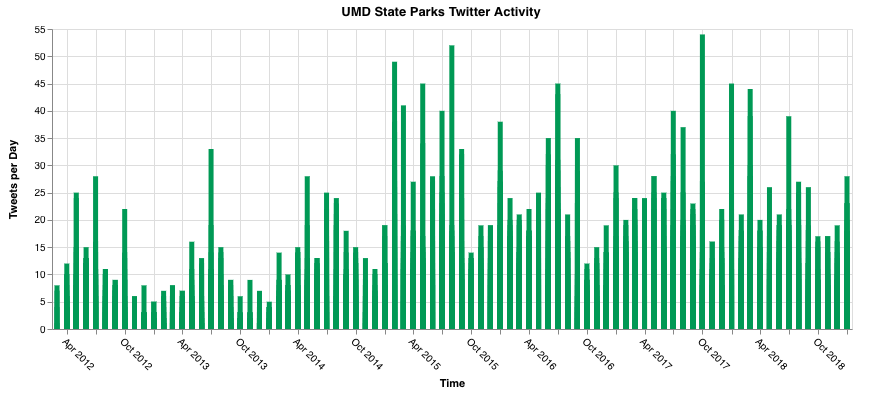

In [16]:
import altair

altair.renderers.enable('notebook')

chart = altair.Chart(times, width=800, title="UMD State Parks Twitter Activity")
chart = chart.configure_axisX(labelAngle=45)

chart = chart.mark_bar().encode(
    altair.X('yearmonth(created_at):T', title="Time"),
    altair.Y('tweets', title="Tweets per Day"),
)

chart = chart.configure_mark(color='#095')

chart

### Replies

One of the nice things about the individual accounts is that they can provide local context and respond more personally to people. Let's see if this is reflected in the data by printing out the replies:

In [120]:
reply_count = 0
for index, row in tweets.iterrows():
    if row['in_reply_to_screen_name']:
        reply_count += 1
        print('@{} ➜ @{}'.format(row['user_screen_name'], row['in_reply_to_screen_name']))
        print(row['text'])
        print('https://twitter.com/{}/status/{}'.format(row['user_screen_name'], row['id']))
        print(row['created_at'])
        print('')
    

@PocomokeRiverSP ➜ @nan
RT @NationalZoo: Tian Tian woke up this morning to a lot of snow, and he was pretty excited about it. 🐼🌨 #blizzard2016 https://t.co/GrhI9t1…
https://twitter.com/PocomokeRiverSP/status/690953235771731969
2016-01-23 17:44:23

@JanesIslandSP ➜ @nan
RT @NASA: Pluto sent a love note back to Earth via @NASANewHorizons. This is the last image taken before today's #PlutoFlyby. http://t.co/a…
https://twitter.com/JanesIslandSP/status/621087503219621888
2015-07-14 22:42:54

@TubmanSP ➜ @nan
RT @TheBlackSchlr: A real picture of Harriet Tubman in full color https://t.co/qnQDN0dICi
https://twitter.com/TubmanSP/status/1059096922986868737
2018-11-04 14:55:58

@RockyGapSP ➜ @nan
RT @usahockey: 35 years ago today. Do you believe in miracles? http://t.co/UB8JXsJXcf
https://twitter.com/RockyGapSP/status/569526645821968385
2015-02-22 15:58:28

@RockyGapSP ➜ @nan
RT @VP: Our hearts are with Paris tonight. As we learn more about these tragic attacks, we stand together. We will never b

@AssateagueSP ➜ @nan
Why the name? #Assateague in #NativeAmerican language means "swiftly moving water" or "a running stream between" https://t.co/i9zVLm2TPj
https://twitter.com/AssateagueSP/status/888578815299125248
2017-07-22 01:57:53

@AssateagueSP ➜ @nan
Lots of horses on the beach today Day Use. No food and stay a safe distance from them. https://t.co/SrWAe3sI1G
https://twitter.com/AssateagueSP/status/751463142568267776
2016-07-08 17:09:09

@PocomokeRiverSP ➜ @nan
RT @ChildrenNature: Read the top 3 reasons why you and your kids should #learnoutside https://t.co/2gM7dCgtS8
https://twitter.com/PocomokeRiverSP/status/668998909025509376
2015-11-24 03:45:43

@TubmanSP ➜ @nan
RT @Tubman_Byway: Come to #HarrietTubman Country on MD's Eastern Shore -- the land where Tubman lived, toiled, and fled -- and learn the st…
https://twitter.com/TubmanSP/status/966715152396640256
2018-02-22 16:43:47

@DeepCreekLakeSP ➜ @nan
-14 With the wind chill this morning but that does not stop the ice fisherm


@DeepCreekLakeSP ➜ @nan
Don’t miss “Feathers in Focus” Saturday May 5th at the Aviary.  The birds will be perched outside for unobstructed viewing, photography, painting or whatever your art form! Donation.  2 p.m.- 3 p.m. https://t.co/VWLiScGjY6
https://twitter.com/DeepCreekLakeSP/status/991094673300250624
2018-04-30 23:19:18

@JanesIslandSP ➜ @nan
A beautiful night along the mid- Atlantic Coast! https://t.co/Nr2r2csY2B
https://twitter.com/JanesIslandSP/status/787830637252243456
2016-10-17 01:40:35

@TubmanSP ➜ @nan
RT @GirlTrek: Thanks Ranger Angela of @TubmanSP for showing up to send the #GirlTrek team off as we begin  #HarrietsGreatEscape See Angela…
https://twitter.com/TubmanSP/status/971100864038531073
2018-03-06 19:11:02

@TubmanSP ➜ @nan
#StarStruck meeting @MorganTreks @VanessaTreks  of @GirlTrek on their #HarrietsGreatEscape https://t.co/UEQd2AQTWT
https://twitter.com/TubmanSP/status/971103950354165761
2018-03-06 19:23:18

@AssateagueSP ➜ @nan
#MorningMotivation #beautifulda


@RockyGapSP ➜ @nan
RT @MarineMuseum: Happening now! Our annual MRE cook-off...YUM! http://t.co/RPj177hAjv
https://twitter.com/RockyGapSP/status/564112416074907650
2015-02-07 17:24:15

@PatapscoSP ➜ @nan
RT @MDStateParks: A lot of First Day Hikes to choose from in #Maryland . Join us! https://t.co/ozJA5WoRpO #firstdayhike
https://twitter.com/PatapscoSP/status/814940424657928192
2016-12-30 21:05:12

@RockyGapSP ➜ @nan
Between the rainbow and blooms, there are so many colors to enjoy this time of year! Ranger Christine caught this pretty photo of Martins Mountain as seen from the White Pine area of the park. https://t.co/vonO8QbjLl
https://twitter.com/RockyGapSP/status/990015116346384385
2018-04-27 23:49:31

@AssateagueSP ➜ @nan
Day Use closed today due to dangerous surf and high tides. https://t.co/3zk0WaxO6A
https://twitter.com/AssateagueSP/status/841648020831817728
2017-03-14 13:51:39

@TubmanSP ➜ @nan
RT @GaryBrennan10: Went to the Harriet Tubman Underground Railroad State Park today

https://twitter.com/SmallwoodSP/status/766791642456010752
2016-08-20 00:19:08

@PocomokeRiverSP ➜ @nan
RT @chesapeakebay: All you #ChesBay &amp; #CleanWater lovers out there: This #Valentine is for you: https://t.co/fB0GFDawfH #ValentinesDay http…
https://twitter.com/PocomokeRiverSP/status/698929721678151681
2016-02-14 18:00:05

@TubmanSP ➜ @nan
These #SomersetCounty students completed our #HarrietTubman scavenger hunt &amp; learned about her early years in #Md. https://t.co/tq7usgnKrg
https://twitter.com/TubmanSP/status/867769218829299712
2017-05-25 15:47:58

@SmallwoodSP ➜ @nan
What a beautiful way to start the weekend. Looks like the last day of the @FLWFishing tournament here brought sun! https://t.co/5XgPVdcYqV
https://twitter.com/SmallwoodSP/status/744108051817336832
2016-06-18 10:02:39

@FortFrederickSP ➜ @nan
RT @PreservationMD: .@FortFrederickSP is host this weekend to dozens of 18th c. artisans! #bestofmaryland #preservation http://t.co/ViL2UPN…
https://twitter.com/FortFreder

2016-12-23 22:55:48

@CunninghamFalls ➜ @nan
We're going on an Owl Prowl this Friday at Cunningham Falls! Meet us at the Houck Lakeside Nature Center at 8:30pm! https://t.co/zh1rWpaa8V
https://twitter.com/CunninghamFalls/status/751083055956111360
2016-07-07 15:58:49

@RockyGapSP ➜ @nan
#NoFilter #rockygap #sunset #incredible We are the luckiest! #marylandstateparks https://t.co/KvnSCtSag7
https://twitter.com/RockyGapSP/status/691755424912150530
2016-01-25 22:52:00

@TubmanSP ➜ @nan
A few #JacobLawrence pieces are featured in the Visitor Center. Visit us in March and have a #TubmanExperience. https://t.co/ti6272cpzt
https://twitter.com/TubmanSP/status/817900502071517184
2017-01-08 01:07:30

@AssateagueSP ➜ @nan
It's better if you come and see this in person. 1-888-432-CAMP. Photos: Ranger Marc Heim https://t.co/AA9o8qgrHQ
https://twitter.com/AssateagueSP/status/864872667442286593
2017-05-17 15:58:07

@TubmanSP ➜ @nan
"In the eastern shore of #MD Dorchester County is where I was born." #

https://twitter.com/JanesIslandSP/status/567523467944525825
2015-02-17 03:18:33

@HerringtonMnrSP ➜ @nan
Rngr Rafi welcomes dogs to Swallow Falls SP now thru Memorial Day wkend. Rmbr 6' leash, undr ur cntl&amp; to pick-up https://t.co/eV6slUUDxD
https://twitter.com/HerringtonMnrSP/status/772989709605806084
2016-09-06 02:48:02

@HerringtonMnrSP ➜ @nan
It's going to be a beautiful weekend.  Come out and explore the natural beauty @HerringtonMnrSP http://t.co/21ge9tYB61
https://twitter.com/HerringtonMnrSP/status/637631693143281664
2015-08-29 14:23:36

@GreenbrierSP ➜ @nan
RT @MDDNRFISH: Here is a summary of this week's trout stocking activities.
Enjoy your weekend with a fishing rod in hand!
Information on Ma…
https://twitter.com/GreenbrierSP/status/1048986087459311616
2018-10-07 17:19:07

@RockyGapSP ➜ @nan
Zebra #swallowtail! This pretty lil #butterfly landed to say hello! #MDInFocus #Maryland http://t.co/mX8tKoaZTB
https://twitter.com/RockyGapSP/status/612416416369745920
2015-06-21 00:


@TubmanSP ➜ @nan
Good morning from #TubmanCountry! The park opens at 9 am, visit us &amp; learn about #HarrietTubman's life #MD #sunrise https://t.co/PukdNSMGwy
https://twitter.com/TubmanSP/status/908299853293342721
2017-09-14 12:02:15

@DeepCreekLakeSP ➜ @nan
Do you want to make a snowman? @AccessDNR #EarthDay #snowinapril http://t.co/5st1doWiFh
https://twitter.com/DeepCreekLakeSP/status/590895972332503041
2015-04-22 15:12:32

@TubmanSP ➜ @nan
RT @MarylandDNR: Maryland State Offices are closed for the holiday but Maryland State Parks are open. #getoutdoors https://t.co/oeHoYs8wQT
https://twitter.com/TubmanSP/status/1049279698663092230
2018-10-08 12:45:49

@PocomokeRiverSP ➜ @nan
RT @MarylandDNR: The @MarylandBPW today unanimously voted to approve the Maryland Department of Natural Resources acquisition of 224.5 acre…
https://twitter.com/PocomokeRiverSP/status/986662452279554052
2018-04-18 17:47:14

@TubmanSP ➜ @nan
RT @SenecaCreekSP: It's turtle egg laying season! Keep an eye on the 

We’re currently experiencing higher than normal tides at boat ramp at Milburn Landing. Preparations have begun. https://t.co/oNYUbGXzF2
https://twitter.com/PocomokeRiverSP/status/1039542292611248128
2018-09-11 15:52:50

@RockyGapSP ➜ @nan
We had a blast at the Hooley Plunge this weekend! About 500 plungers raised $86,000 to go toward Allegany Co. charities! Tag @RockyGapSP in your favorite pics from the day. A few of ours are below! https://t.co/R31KpZUCWw
https://twitter.com/RockyGapSP/status/970475250633924610
2018-03-05 01:45:04

@GunpowderSP ➜ @nan
Our crews are making progress clearing trees downed by the wind storm last week. If you find areas on our trails that require attention, please call our park headquarters at 410-592-2897 and we will address them as quickly as possible. https://t.co/u7eUjluxrv
https://twitter.com/GunpowderSP/status/971118829844815874
2018-03-06 20:22:26

@AssateagueSP ➜ @nan
It's that time of year..... https://t.co/EhEIP9KfY0
https://twitter.com/Assateagu

https://twitter.com/PatapscoSP/status/701530535898828800
2016-02-21 22:14:48

@AssateagueSP ➜ @nan
RT @StateMaryland: #Truth  Ponies on the beach! RT @beachandbeyond: Because, ponies! VOTE @AssateagueSP for BEST STATE PARK! http://t.co/k3…
https://twitter.com/AssateagueSP/status/578589037709131776
2015-03-19 16:09:10

@GunpowderSP ➜ @nan
RT @MDStateParks: On this #NationalDogDay, check out our pet policy &amp; list of parks that allow your canine friends! https://t.co/7dHhgi9kV2
https://twitter.com/GunpowderSP/status/769295496913494018
2016-08-26 22:08:33

@AssateagueSP ➜ @nan
Early bird catches the....fish https://t.co/PLC7efRU7t
https://twitter.com/AssateagueSP/status/897823599654043648
2017-08-16 14:13:21

@AssateagueSP ➜ @nan
TURTLE release! 3 Kemp's Ridleys; Sept 11 at 11:30; South end of Day Use Beach @NatlAquarium http://t.co/nAHcWrAis8
https://twitter.com/AssateagueSP/status/640924838207614976
2015-09-07 16:29:23

@PocomokeRiverSP ➜ @nan
Smokey Bear checking out New Cabin at Sh

@RockyGapSP ➜ @nan
This baby American kestrel is on her way to owlmoonrc to be "hacked" (term for a measured release)… https://t.co/iORqo0knNb
https://twitter.com/RockyGapSP/status/606247511561543680
2015-06-03 23:54:04

@CunninghamFalls ➜ @nan
Have you ever wondered what it looks like inside the Tea Room? Now's your chance to find out! Join us on Wed. September 12th from 4pm - 7pm to tour the Tea Room! 

Can't make it? We'll open it up again one last time for the year on Wed. October 10th from 4pm-7pm! https://t.co/3LRBsZW6kW
https://twitter.com/CunninghamFalls/status/1037445268923240448
2018-09-05 21:00:01

@RockyGapSP ➜ @nan
Happy #NationalDogDay 🐾 We just can’t get enough of our furry visitors!  Bring your pup out to Rocky Gap to celebrate with a picnic, hike or swim! https://t.co/xp4cr0XDVf
https://twitter.com/RockyGapSP/status/1033706300335644674
2018-08-26 13:22:41

@TubmanSP ➜ @nan
RT @AndreaVernot: Great article on @Tubman_Byway &amp; @TubmanSP @Rkobell in @ChesBayJournal w/am

@GreenbrierSP ➜ @nan
View from Washington Monument SP just before park closing for the day. https://t.co/P7Q4tT89f7
https://twitter.com/GreenbrierSP/status/809168147513278470
2016-12-14 22:48:14

@PointLookoutSP ➜ @nan
RT @MDStateParks: The application deadline has been extended for several parks throughout hr state. Apply Now! #bestjobever https://t.co/vK…
https://twitter.com/PointLookoutSP/status/829075810841657345
2017-02-07 21:14:11

@PointLookoutSP ➜ @nan
RT @MarylandDNR: Join us for our Annual Blue &amp; Gray Days Weekend at @PointLookoutSP  June 10 &amp; 11. Activities include Infantry drill and mu…
https://twitter.com/PointLookoutSP/status/872452107361673216
2017-06-07 13:56:06

@PointLookoutSP ➜ @nan
RT @MarylandDNR: JOB OPPORTUNITY: Veteran Conservation Corps seasonal Crew Member. Closing date is January 19th. https://t.co/NNqkQnvibr ht…
https://twitter.com/PointLookoutSP/status/818098662987403265
2017-01-08 14:14:55

@PointLookoutSP ➜ @nan
The saw-whet migration is coming to


@NewGermanySP ➜ @nan
Surprise snow shower currently at New Germany. The trees sure look pretty under their blanket of fresh snow.
https://twitter.com/NewGermanySP/status/808711541033988096
2016-12-13 16:33:51

@PatapscoSP ➜ @nan
Fern fronds unfurling on the Cascade Falls Trail at Avalon today http://t.co/Z3TUUnA4SQ
https://twitter.com/PatapscoSP/status/456573564917792768
2014-04-16 23:23:15

@TubmanSP ➜ @nan
RT @TubmanUGRRNPS: Celebrating Harriet Tubman on Juneteenth https://t.co/31Ho6xJ1rr
https://twitter.com/TubmanSP/status/877247759946063872
2017-06-20 19:32:19

@PocomokeRiverSP ➜ @nan
Santa's Hummingbirds @PocomokeRiverSP #FindYourPark #hummingbirds https://t.co/b3zJLjto6i
https://twitter.com/PocomokeRiverSP/status/740866773608738816
2016-06-09 11:22:58

@PatapscoSP ➜ @nan
Historic Red Dog Lodge will be open this weekend from 11-3 at Soldiers Delight http://t.co/lSCUkAKfmd
https://twitter.com/PatapscoSP/status/482670387638337538
2014-06-27 23:42:42

@NewGermanySP ➜ @nan
TONIGHT: F

@JanesIslandSP ➜ @nan
RT @CanoeKayakMag: From supporting veterans to empowering cancer survivors, meet true heroes of our sport. https://t.co/kcYiT7GKqh
https://twitter.com/JanesIslandSP/status/705119918212009984
2016-03-02 19:57:43

@TubmanSP ➜ @nan
RT @vickieroberts: 'Good Old Ship of Zion' will have different meeting to me now. https://t.co/KwAwidqO3e
https://twitter.com/TubmanSP/status/1078396033409929216
2018-12-27 21:03:44

@SusquehannaSP ➜ @nan
Persimmon are starting to ripen http://t.co/CMPalB9R4r
https://twitter.com/SusquehannaSP/status/647224050691915776
2015-09-25 01:40:13

@AssateagueSP ➜ @nan
Escorting Smokey the Bear in the Firemen's Parade #RangersFamily https://t.co/qk2tNLgjPF
https://twitter.com/AssateagueSP/status/877891334023008257
2017-06-22 14:09:39

@NewGermanySP ➜ @nan
The #Casselman Bridge  turns 200 this year!  Mark your calendars for the Bicentennial - September 20-22!
https://twitter.com/NewGermanySP/status/298884954555813888
2013-02-05 20:05:00

@TubmanSP ➜ 

https://twitter.com/PatapscoSP/status/660067237005496320
2015-10-30 12:14:27

@GunpowderSP ➜ @nan
Lifeguards needed! Multiple vacancies (incl. Gunpowder) available. Hurry, closing date is April 22! http://t.co/qFuUOU5s1g
https://twitter.com/GunpowderSP/status/590556655965904896
2015-04-21 16:44:13

@SenecaCreekSP ➜ @nan
New at the Visitor Center: our "Histor-Tree." This mighty oak sprouted in the Park before the Civil War. https://t.co/01SRGAlMx6
https://twitter.com/SenecaCreekSP/status/908799479758905346
2017-09-15 21:07:35

@AssateagueSP ➜ @nan
Vote for Assateague Island, Va. / Md. as the Best U.S. Island @10Best. I voted! #10BestChoice http://t.co/SshT71KUyZ
https://twitter.com/AssateagueSP/status/471356048582787073
2014-05-27 18:23:34

@TuckahoeSP ➜ @nan
FAMILY FUN DAY on the Challenge Course - Sat., 5/17,11am-2pm. Rock wall, zipline, giant swing, etc. $25/person, $15/kids7-15. (410)820-1668.
https://twitter.com/TuckahoeSP/status/466959026459525122
2014-05-15 15:11:22

@GunpowderSP

2015-01-31 19:29:30

@AssateagueSP ➜ @nan
New landscaping for our new entrance sign....awesome! http://t.co/5oYrLt78yJ
https://twitter.com/AssateagueSP/status/469291687953829889
2014-05-22 01:40:32

@FortFrederickSP ➜ @nan
Join us for our #FirstDayHike where we'll be taking in the winter scenery at the park including the Potomac and our beaver pond! https://t.co/N5HWDBSbah
https://twitter.com/FortFrederickSP/status/1078366201271717890
2018-12-27 19:05:12

@CunninghamFalls ➜ @nan
MANOR AREA PLAYGROUND NOW OPEN @CunninghamFalls 

Come on out and enjoy this amazing new play area!!!

Don't forget to check out our aviary with several birds of prey on display while at the Manor Area.
https://twitter.com/CunninghamFalls/status/928370087727386624
2017-11-08 21:14:11

@FortFrederickSP ➜ @nan
Glassy waters of the Potomac River, early in the AM https://t.co/D2X0R2msdP
https://twitter.com/FortFrederickSP/status/1021065014713757696
2018-07-22 16:10:44

@TubmanSP ➜ @nan
The Park &amp; Visitor Center

https://twitter.com/NewGermanySP/status/1013864680761241600
2018-07-02 19:19:11

@NewGermanySP ➜ @nan
Dan's Mountain Pool will be closed on weekdays beginning 8/24, due to lifeguard shortages. It will be open on weekends through Labor Day.
https://twitter.com/NewGermanySP/status/634355088446881792
2015-08-20 13:23:33

@RockyGapSP ➜ @nan
We are so fortunate to share this world w/the majesty of nature. #blessed #redeemer #resetbutton http://t.co/w0G9E0cCXi
https://twitter.com/RockyGapSP/status/586340747202469888
2015-04-10 01:31:42

@TubmanSP ➜ @nan
Bundle up &amp; join park rangers for our first #FirstDayHike in #TubmanCountry on 1/1/18 at 10 am! https://t.co/rPYeE6vhRF
https://twitter.com/TubmanSP/status/947173016756211712
2017-12-30 18:30:19

@RockyGapSP ➜ @nan
#deerbrowsing of our new #easternhemlock :( http://t.co/8KAXCHof8X
https://twitter.com/RockyGapSP/status/453622045935276032
2014-04-08 19:54:58

@RockyGapSP ➜ @nan
RT @USFWSBirds: Power Struggles Are Playing Out at Your Feeder—

@TubmanSP ➜ @nan
RT @Marty_Sandiego: Wow!!! Im learning today! I live my black history in travel facts i can’t wait to share this one! https://t.co/YzjdZEJV…
https://twitter.com/TubmanSP/status/1034969710348169216
2018-08-30 01:03:02

@TubmanSP ➜ @nan
#Teachers from #Wicomico County #Maryland are watching our #HarrietTubman re-enactor before their tour! https://t.co/KQnP4pEXn0
https://twitter.com/TubmanSP/status/878296217331134464
2017-06-23 16:58:30

@TubmanSP ➜ @nan
This open letter from Harriet Tubman quotes our park historian @KCliffLarson &amp; our partners @TubmanUGRRNPS https://t.co/6Pqqih3ujG
https://twitter.com/TubmanSP/status/1035203413427019777
2018-08-30 16:31:41

@NewGermanySP ➜ @nan
Up date! Ski trails have accumulated enough snow! We will be renting in the lake house until 4 pm!
https://twitter.com/NewGermanySP/status/960193346491899904
2018-02-04 16:48:27

@PatapscoSP ➜ @nan
Join us for a fall hike at Avalon on the Grist Mill trail Friday the 7th from 10am-12pm http://t

Just a light dusting of snow to make the park scenery look even more beautiful http://t.co/RCgfmckwIi
https://twitter.com/PatapscoSP/status/448646155141136385
2014-03-26 02:22:33

@NewGermanySP ➜ @nan
AUG. 26 Twilight Hike, 7:30 pm. This easy, one-mile hike will begin at the Lake House, wear appropriate foot wear and bring a flashlight.
https://twitter.com/NewGermanySP/status/767806629626712064
2016-08-22 19:32:20

@TubmanSP ➜ @nan
RT @Kaygirl8Lawana: $21 Million Harriet Tubman State Park Project Now Open https://t.co/Jk5qcVShPp
👏
https://twitter.com/TubmanSP/status/918623960429989888
2017-10-12 23:46:34

@TubmanSP ➜ @nan
A muskrat made a home in our pond. Visit the park &amp; learn the role muskrats played in Tubman's childhood. https://t.co/RZURJeP8BX
https://twitter.com/TubmanSP/status/993477525878837248
2018-05-07 13:07:54

@PatapscoSP ➜ @nan
This Sunday from 1-2:30, come learn about The History of the Patapsco River Valley at Avalon, meet at VC. More info http://t.co/XvMh6cH1Fj
ht

@GunpowderSP ➜ @nan
RT @TubmanSP: Join us for our Grand Opening! https://t.co/U6AVTdJcai
https://twitter.com/GunpowderSP/status/833469326237777920
2017-02-20 00:12:27

@HerringtonMnrSP ➜ @nan
Mark the date. Herrington Manor Fishing Rodeo is Saturday, June 6th from 8-11am. Registration starts at 7am. http://t.co/T7eN5pd5AI
https://twitter.com/HerringtonMnrSP/status/605191283762704384
2015-06-01 01:57:00

@GunpowderSP ➜ @nan
RT @SuskyWildlife: Last night we rescued dozens of #amphibians from the roads during the warm rains. Use caution when driving, u never know…
https://twitter.com/GunpowderSP/status/836970039895015425
2017-03-01 16:03:02

@GunpowderSP ➜ @nan
Attention anglers! Several areas of Gunpowder will be stocked with trout next week. Schedule in link! https://t.co/ubnCE5MbF0
https://twitter.com/GunpowderSP/status/837777629667282946
2017-03-03 21:32:06

@GunpowderSP ➜ @nan
Begin your career in the outdoors by working at GFSP! Many opportunities to expand your job skills. Apply on

@RockyGapSP ➜ @nan
RT @MDStateParks: Join instructor Leslee Wigfield on August 7th to unwind through an energizing yoga practice on the beach at Rocky Gap Sta…
https://twitter.com/RockyGapSP/status/1026215745838100480
2018-08-05 21:17:54

@AssateagueSP ➜ @nan
Two Coastal Free Fishing Areas in Ocean City http://t.co/JL3UV0Fc http://t.co/bB9FXOTf
https://twitter.com/AssateagueSP/status/244068656127029248
2012-09-07 13:44:37

@RockyGapSP ➜ @nan
We are so proud of our lifeguards, who represented Rocky Gap well today during the MD State Park Lifeguard Competition on Hart-Miller Island. We truly value all their hard work and contributions to serving our visitors 💛❤️ https://t.co/LzrL4VJ1Dx
https://twitter.com/RockyGapSP/status/1027004662594056193
2018-08-08 01:32:47

@RockyGapSP ➜ @nan
Day 2 of Ranger Camp had the group kayaking, hiking to Pennsylvania, prepping firewood for campers and learning all about Monarchs (and even collecting some caterpillars for the Nature Center)! https://t.co/fb

@FortFrederickSP ➜ @nan
Spring @FortFrederickSP #turkey #nature #FindYourPark #getoutside https://t.co/7lkZDwD6pf
https://twitter.com/FortFrederickSP/status/853981410452840448
2017-04-17 14:40:09

@PointLookoutSP ➜ @nan
St. Mary's River State Park has reopened!
https://twitter.com/PointLookoutSP/status/819208185168982016
2017-01-11 15:43:46

@PointLookoutSP ➜ @nan
With the Winter Storm Warning, our Nature Center will be closed tomorrow 1/7. Follow @MDMEMA &amp; @MDSHA for weather updates. #snow #hotcocoa https://t.co/ur1t3qyhxi
https://twitter.com/PointLookoutSP/status/817408652122423296
2017-01-06 16:33:04

@PointLookoutSP ➜ @nan
Did you know that Pt Lookout is a great spot to see Bald Eagles? Look for them when you're in the park! #wildlifephotography #baldeagle https://t.co/fcswzsJ35E
https://twitter.com/PointLookoutSP/status/810959036145369088
2016-12-19 21:24:35

@PointLookoutSP ➜ @nan
HAPPENING NOW: Invasion! War of 1812 at Point Lookout. Drills and open camps at the Fort, battle


@AssateagueSP ➜ @nan
RT @MAEOE_MD: Going to the #MAEOEConference? Help w/ a dune fencing service project @AssateagueSP on Friday Feb. 5th, 9-12 PM. https://t.co…
https://twitter.com/AssateagueSP/status/692030927791349760
2016-01-26 17:06:45

@SmallwoodSP ➜ @nan
Come see the First Maryland Regiment's living history event, Oct 7-8th from 10-4. Park entrance fees apply For more info call (301) 743-7613
https://twitter.com/SmallwoodSP/status/910533155366383617
2017-09-20 15:56:35

@PatapscoSP ➜ @nan
RT @njdvlsrule: MD Park Quest #8: @PatapscoSP McKeldin area https://t.co/KkIo4rkujU
https://twitter.com/PatapscoSP/status/772123873605193728
2016-09-03 17:27:31

@GunpowderSP ➜ @nan
Trees are beginning to fall throughout the park due to wet conditions and sustained wind gusts (averaging 30mph at this point, expected to get stronger this afternoon). Please exercise extreme caution through Saturday!
https://twitter.com/GunpowderSP/status/969583913227247616
2018-03-02 14:43:13

@PocomokeRiverSP ➜

Thanx to a Good Samaritan park staff were able 2 reunite this pup with her owners. Happy ending to a beautiful day! https://t.co/wid3WWEnqq
https://twitter.com/fairhillsp/status/704107501432803330
2016-02-29 00:54:44

@FortFrederickSP ➜ @nan
Come out to @FortFrederickSP this Weekend &amp; see the MD Forces as they garrison the fort https://t.co/msr6OAKDoB
https://twitter.com/FortFrederickSP/status/833764073938448384
2017-02-20 19:43:40

@RockyGapSP ➜ @nan
When adorably-dressed children say adorable things, #rangers do this :) #HooleyPlunge #laughingatwork #hooley https://t.co/PLiFAWGop3
https://twitter.com/RockyGapSP/status/706243452716130305
2016-03-05 22:22:15

@FortFrederickSP ➜ @nan
Happening now: Park staff, volunteers, and @MonarchWashCo  planting new pollinator habitat in the park https://t.co/6Al8AxQk9l
https://twitter.com/FortFrederickSP/status/909425862587633668
2017-09-17 14:36:36

@FortFrederickSP ➜ @nan
Come on out this Saturday, April 1st, to our Youth Fishing Rodeo! Open

2016-09-01 14:11:04

@NewGermanySP ➜ @nan
X-country ski conditions 3/14/14: 5" packed, icy base, with 1" of loose snow. Mostly sunny today with a high near 53.
https://twitter.com/NewGermanySP/status/444482205537284097
2014-03-14 14:36:30

@PatapscoSP ➜ @nan
Weather is looking clear for tomorrow's first big trail day. Come one come all the Cascade trail needs help to finish. Free shirts and food.
https://twitter.com/PatapscoSP/status/711342561122770944
2016-03-20 00:04:17

@RockyGapSP ➜ @nan
How we do #greenfriday at the Gap! #LeaveNoTrace #TrashYourTrash We hiked through and pick… https://t.co/iWftIfC0Ur https://t.co/qhdlpaLAHN
https://twitter.com/RockyGapSP/status/802244972728713216
2016-11-25 20:18:01

@PatapscoSP ➜ @nan
The river is packed today with fishermen for Opening Day
https://twitter.com/PatapscoSP/status/713692466759790592
2016-03-26 11:41:58

@RockyGapSP ➜ @nan
So excited about the work done recently by the MPS MCC crew and the MD DNR Forest Service … https://t.co/qnmvtfp

2018-10-26 13:15:17

@GunpowderSP ➜ @nan
Join us for one of our exciting programs this Sat. June 18 @ Jerusalem Mill! More info below! https://t.co/Z7hfYHV5T1
https://twitter.com/GunpowderSP/status/743203865638612992
2016-06-15 22:09:44

@GunpowderSP ➜ @nan
Three hikes in northern Balt. Co tomorrow AND a campfire @ Sparks @ 5:30 pm! Join us!!!!! https://t.co/l2F9rKPvvP
https://twitter.com/GunpowderSP/status/743560132018114560
2016-06-16 21:45:24

@GunpowderSP ➜ @nan
Got a #boat? Take dad to Hart-Miller Island for #Father'sDay and enjoy the #trails, #bike rentals and #wildlife! https://t.co/rUoeXHoy4D
https://twitter.com/GunpowderSP/status/744303591041732608
2016-06-18 22:59:39

@PatapscoSP ➜ @nan
They did it! #rangermccarthy #rangerramirez https://t.co/78MYc5ih7z
https://twitter.com/PatapscoSP/status/665240417793912832
2015-11-13 18:50:49

@CunninghamFalls ➜ @nan
Campers enjoying their edible camp fires at the Great American Backyard Camp Out at CFSP. Thanks for the memories! http://t.

https://twitter.com/RockyGapSP/status/747099301139054592
2016-06-26 16:08:48

@PatapscoSP ➜ @nan
Congratulations to the Junior Rangers class of 2017! 🐻🐢🐍🦉🌳 https://t.co/BhG4qBQx9N
https://twitter.com/PatapscoSP/status/891736006344540160
2017-07-30 19:03:26

@PatapscoSP ➜ @nan
All areas of Patapsco and Soldiers Delight will be closed due to snow and ice until further notice. Stay safe.
https://twitter.com/PatapscoSP/status/559712164165210112
2015-01-26 13:59:13

@PatapscoSP ➜ @nan
LARGE event using entire McKeldin area TODAY.  Klondike derby.  Please consider using one of our other areas.
https://twitter.com/PatapscoSP/status/561496574967414785
2015-01-31 12:09:50

@PatapscoSP ➜ @nan
The Hilton Nature Center will be closed today 11-3 for Junior Rangers Graduation.
https://twitter.com/PatapscoSP/status/891668106329960449
2017-07-30 14:33:37

@NewGermanySP ➜ @nan
Please take a moment after visiting to let us know about your visit.
English: https://t.co/iouGBwwURc Spanish: https://t.co/lW3

https://twitter.com/CunninghamFalls/status/847820255930003456
2017-03-31 14:37:55

@PatapscoSP ➜ @nan
Stuck indoors today? Think happy outside thoughts! Share us your photos from your First Day Hike https://t.co/t89zatUtaU
https://twitter.com/PatapscoSP/status/1080846118794289152
2019-01-03 15:19:30

@NewGermanySP ➜ @nan
Today: Sunny, with a high near 27. Yesterday and overnight we received about 1 1/2-2" of snow, but there's not enough for X-country skiing.
https://twitter.com/NewGermanySP/status/838016172385779713
2017-03-04 13:19:59

@RockyGapSP ➜ @nan
This is who #iDriveFor during Breast Cancer Awareness Month. Let's help finish the fight! https://t.co/0sW4hnqMRH https://t.co/kN98aB45qv
https://twitter.com/RockyGapSP/status/659784770772168704
2015-10-29 17:32:02

@PatapscoSP ➜ @nan
RT @ShenandoahNPS: Fighting non-native species is hard work. 
https://t.co/Xrys83epUo
https://t.co/vi4B6V3wAS
https://twitter.com/PatapscoSP/status/679133071870959616
2015-12-22 02:55:16

@PatapscoSP ➜ @

Schedule a field trip by calling 410-641-2120 Ext 12
https://twitter.com/AssateagueSP/status/968677830702829568
2018-02-28 02:42:46

@HerringtonMnrSP ➜ @nan
They're calling for a white Christmas here but not enough for ski rentals. Maybe enough snow by New Year's weekend. We'll keep you posted.
https://twitter.com/HerringtonMnrSP/status/944956578033274885
2017-12-24 15:42:59

@PointLookoutSP ➜ @nan
RT @CMLese: @PointLookoutSP thank you for the excellent tour of Fort Lincoln this past weekend. http://t.co/OQbO7MXv8p
https://twitter.com/PointLookoutSP/status/610165167645704194
2015-06-14 19:21:26

@TubmanSP ➜ @nan
RT @Dion_ba: Looking forward to it!  💪🏾 https://t.co/VWE6DkJR1N
https://twitter.com/TubmanSP/status/1071230828913573889
2018-12-08 02:31:46

@PointLookoutSP ➜ @nan
RT @TravelSMC: #EventsWeLove in St. Mary's: Seeing the famous @PtLookoutLH at @PointLookoutSP at the monthly open house! #lighthouse http:/…
https://twitter.com/PointLookoutSP/status/582880271520911360
2015-03-31 12:

RT @KCliffLarson: 😍 https://t.co/uxd81l2RnY
https://twitter.com/TubmanSP/status/1029740518647967745
2018-08-15 14:44:05

@TubmanSP ➜ @nan
RT @Johannsone: @TubmanSP They are so beautiful!
https://twitter.com/TubmanSP/status/985890694312144896
2018-04-16 14:40:33

@SenecaCreekSP ➜ @nan
PROGRAM UPDATE: Due to inclement weather, we have decided to postpone the Campfire Program at Patuxent River State Park scheduled for today. The program will now be this Sunday at 1 pm.
https://twitter.com/SenecaCreekSP/status/1055841981824450561
2018-10-26 15:21:59

@AssateagueSP ➜ @nan
Sand dragon entry in our Sand Castle contest #beachlife https://t.co/AjIqdoSPCc
https://twitter.com/AssateagueSP/status/1013915235441356800
2018-07-02 22:40:04

@SenecaCreekSP ➜ @SenecaCreekSP
UPDATE: Due to forecast inclement weather, the Blair Witch Hike will now take place on SUNDAY OCTOBER 28 at 2PM.  Space still available, registration required.  Call 301-924-2127 to register.
https://twitter.com/SenecaCreekSP/status/

Check our website for migratory goose hunting lottery &amp; info at the park: http://t.co/7WlTbfepd4
https://twitter.com/TuckahoeSP/status/643944232911249409
2015-09-16 00:27:23

@TubmanSP ➜ @nan
"Steel Away on the Liberty Lines" &amp; attempt to make it to freedom. Here's Harriet with the completion patch. https://t.co/dCb0uSf6JE
https://twitter.com/TubmanSP/status/1047118593203351552
2018-10-02 13:38:21

@TuckahoeSP ➜ @nan
Santa Clause is at Martinak State Park!!!! https://t.co/AR28ABkUWI
https://twitter.com/TuckahoeSP/status/673268007116910592
2015-12-05 22:29:36

@TuckahoeSP ➜ @nan
Santa's Magic Workshop @ Martinak State Park Dec. 11&amp;12 4-7pm https://t.co/rZm8YruR62
https://twitter.com/TuckahoeSP/status/673361427890085888
2015-12-06 04:40:49

@TubmanSP ➜ @nan
When you visit the park make sure to take a picture with Harriet &amp; your siblings &amp; cheese hard like this lil man! https://t.co/JGVXd80aE4
https://twitter.com/TubmanSP/status/1048598125198413824
2018-10-06 15:37:29


@JanesIslandSP ➜ @nan
When the snow's over plan a getaway! Full Service Cabins #2&amp;3 open FEB 20th-26th.--www.reservations.dnr.state.md.us
https://twitter.com/JanesIslandSP/status/567519196335337473
2015-02-17 03:01:35

@PocomokeRiverSP ➜ @nan
Eagle Watch!! Contact: Lisa.dennis@maryland.gov 1/16, 23, &amp; 30 #Eagle #boating https://t.co/ZRUmTH0sXn
https://twitter.com/PocomokeRiverSP/status/686879152708923392
2016-01-12 11:55:26

@PatapscoSP ➜ @nan
Come check out our stream critters, August 16th McKeldin Area 10AM-1230PM. Adv. Reg. Req. http://t.co/PKwibrUr
https://twitter.com/PatapscoSP/status/235463833056059392
2012-08-14 19:52:07

@JanesIslandSP ➜ @nan
Today is the last day to apply for seasonal summer employment at the park.  Apply ONLINE: http://t.co/VpC8XdcIzo  #mdjobs
https://twitter.com/JanesIslandSP/status/574999358241914880
2015-03-09 18:25:04

@PocomokeRiverSP ➜ @nan
RT @MDStateParks: Holiday Craft- Friday, December 8 at Martinak State Park. Get in the holiday spirit whil


@PocomokeRiverSP ➜ @nan
This Friday, 5/26- come meet our roving naturalist at the Camp Store! 5pm-6pm https://t.co/ssJFPDQrxE
https://twitter.com/PocomokeRiverSP/status/867341572232404992
2017-05-24 11:28:39

@TubmanSP ➜ @nan
Are you training for Iron Man? Take a quick break at the park &amp; meet our life size bust of #HarrietTubman https://t.co/mC9tIprOuP
https://twitter.com/TubmanSP/status/909793194967207936
2017-09-18 14:56:15

@RockyGapSP ➜ @nan
When the sun has set, no candle can replace it.
                       George R.R. Martin
#sunset #sky… http://t.co/JYRFFdfMUK
https://twitter.com/RockyGapSP/status/516056735430475776
2014-09-28 02:48:08

@HerringtonMnrSP ➜ @nan
A little cold this morning, but you can warm up by the fire in the lake house! http://t.co/ww8DRqAVHv
https://twitter.com/HerringtonMnrSP/status/432151518662254592
2014-02-08 13:58:45

@DeepCreekLakeSP ➜ @nan
A great eclipse at Deep Creek Lake State Park! #eclipse https://t.co/T9o214admz
https://twitter.com/DeepCr


@SenecaCreekSP ➜ @nan
Nature play space signage is coming right along! Beautiful artwork by our Seasonal Boat Center Attendant Emmy! https://t.co/V7maOJC3x0
https://twitter.com/SenecaCreekSP/status/893885613375729664
2017-08-05 17:25:12

@SenecaCreekSP ➜ @nan
Seneca Rangers cleaning out the Grusendorf log cabin. #logcabin #rangers #history https://t.co/ZC9PUTREWP
https://twitter.com/SenecaCreekSP/status/893523081804873728
2017-08-04 17:24:38

@PocomokeRiverSP ➜ @nan
Nature &amp; all its beauty, seen everyday here. https://t.co/6gOdNaJSbr
https://twitter.com/PocomokeRiverSP/status/896351097123725312
2017-08-12 12:42:09

@AssateagueSP ➜ @nan
RT @TheWriteBudget: Ever camped with wild horses? - http://t.co/wTpSOInOp8 #camping @AssateagueNPS @AssateagueSP
https://twitter.com/AssateagueSP/status/501716786341900289
2014-08-19 13:06:17

@GunpowderSP ➜ @nan
Park rangers from the Hammerman Area installed a beautiful new hand built and painted sign for Dundee Creek Marina. Photo thanks to slipho

https://twitter.com/HerringtonMnrSP/status/571751961810362370
2015-02-28 19:21:04

@HerringtonMnrSP ➜ @nan
RT @RaileyRealty: I just uploaded "Swallow Falls State Park Aerial Video" to Vimeo: https://t.co/CwpR70xXqJ
https://twitter.com/HerringtonMnrSP/status/571852220133711872
2015-03-01 01:59:28

@HerringtonMnrSP ➜ @nan
A fresh dusting of snow but we still have an icy base. Rentals at the Lake House. Fair conditions. It's already warming up.
https://twitter.com/HerringtonMnrSP/status/572030077518659584
2015-03-01 13:46:12

@HerringtonMnrSP ➜ @nan
The snow is still falling, 3" of new snow since 8am this morning.  Trail conditions are good. Come on out for some last minute xc skiing
https://twitter.com/HerringtonMnrSP/status/572075702654246912
2015-03-01 16:47:30

@HerringtonMnrSP ➜ @nan
RT @DCLvacations: Presidents Day Weekend Special! Take $1,500 OFF a 3 Night stay at The Herrington! Call (866) 976-8330 to book!
http://t.c…
https://twitter.com/HerringtonMnrSP/status/425379018574401536


@GunpowderSP ➜ @nan
Due to a local power outage, the restroom facilities at Monkton Station will be closed potentially through the weekend. Portable toilets are located at Sparks, Bentley Spring, and Paper Mill. Please plan ahead!
https://twitter.com/GunpowderSP/status/972196116606472192
2018-03-09 19:43:11

@GunpowderSP ➜ @nan
Today we're set up at the YouthSTEM fair at Lyons Mill Elementary, showing young kids what it's like to be a Park Ranger! https://t.co/nrfQj25w83
https://twitter.com/GunpowderSP/status/797431834556698624
2016-11-12 13:32:19

@fairhillsp ➜ @nan
Instead of just throwing your dog a bone, treat it to a Dog Days of Summer hike! See attached flyer for details... http://t.co/LjG06F92Nj
https://twitter.com/fairhillsp/status/636872154185924608
2015-08-27 12:05:28

@PocomokeRiverSP ➜ @nan
¡Ven a bailar salsa con nosotros! https://t.co/pEZuUBH7Cp
https://twitter.com/PocomokeRiverSP/status/1022541869790756864
2018-07-26 17:59:14

@HerringtonMnrSP ➜ @nan
Join us for an eveni

Deep Creek Lake State Park #icebucketchallenge #deepcreeklakestatepark #marylandstateparks #ALS http://t.co/EmQ3EW0MVJ
https://twitter.com/DeepCreekLakeSP/status/500722416662745088
2014-08-16 19:15:01

@AssateagueSP ➜ @nan
More info on offshore wind posted @ Nature Nook. Your opinion matters! http://t.co/cjtqxMHM
https://twitter.com/AssateagueSP/status/242741547718815744
2012-09-03 21:51:10

@DeepCreekLakeSP ➜ @nan
What raptor in our aviary is the proud owner of these talons? #strong https://t.co/j6muoNvQm5
https://twitter.com/DeepCreekLakeSP/status/692848197631238144
2016-01-28 23:14:17

@DeepCreekLakeSP ➜ @nan
Back to normal. Discovery Center open 10-4 fri-sun.  Try some snowshoes ! https://t.co/cCcR7jA6ai
https://twitter.com/DeepCreekLakeSP/status/692868970559373312
2016-01-29 00:36:50

@RockyGapSP ➜ @nan
Today and tomorrow, staff from around the region are removing hazardous trees from the campground. Plenty of ash and locust are available. Firewood permits are only $10! Call the D

https://twitter.com/DeepCreekLakeSP/status/324148785934643200
2013-04-16 13:14:27

@PatapscoSP ➜ @nan
All areas of Patapsco are now open. Soldiers Delight is still closed, but staff is working now to open it.
https://twitter.com/PatapscoSP/status/947143553100197889
2017-12-30 16:33:14

@DeepCreekLakeSP ➜ @nan
The smell of ramps is in the air!
https://twitter.com/DeepCreekLakeSP/status/327395274165211136
2013-04-25 12:14:50

@PatapscoSP ➜ @nan
The 10:00 Birding Hike at Avalon area of Patapsco Valley state Park has been cancelled due to slippery conditions.
https://twitter.com/PatapscoSP/status/947097804178157569
2017-12-30 13:31:27

@PatapscoSP ➜ @nan
The Avalon Area has opened.  Only the Avalon parking lot is currently open for parking.
https://twitter.com/PatapscoSP/status/1039212479686041600
2018-09-10 18:02:17

@FortFrederickSP ➜ @nan
Monarch butterfly chrysalis @butterfly garden @FortFrederickSP http://t.co/qIYWhmsO
https://twitter.com/FortFrederickSP/status/235828229397684224
2012

Dearest Snow, why don't you stop by more often? You barely write and when you do visit, yo… https://t.co/tJ3ZBXWtfr https://t.co/x8s2LHAwJC
https://twitter.com/RockyGapSP/status/817462195793645569
2017-01-06 20:05:49

@JanesIslandSP ➜ @nan
RT @RockyGapSP: http://t.co/5MmH1yRaRV Can u tell the difference between poison ivy &amp; other plants? http://t.co/sE13Lotqzo
https://twitter.com/JanesIslandSP/status/607191271170572288
2015-06-06 14:24:14

@PatapscoSP ➜ @nan
Fri. March 30th — Camping Roundup — Hilton Youth Group Area Ampitheatre— 1-3 p.m. Free! As a welcome to the 2018 camping season come join us by the campfire and learning the ins and out of camping. Learn how to construct a fire, how to pitch a tent &amp; play a few gear games.
https://twitter.com/PatapscoSP/status/978367646201733120
2018-03-26 20:26:38

@RockyGapSP ➜ @nan
Treat your week with 2 HPHP activities at Rocky Gap, and reap the benefits of indoor, lake view yoga and an invigorating winter hike! https://t.co/vufhtCskyW


@SenecaCreekSP ➜ @nan
Prairie Warbler spotted at Patuxent River State Park.
#birding https://t.co/FaVxGghar1
https://twitter.com/SenecaCreekSP/status/1001802504731025408
2018-05-30 12:28:24

@GunpowderSP ➜ @nan
I wonder what critter lives in this sycamore? https://t.co/DTp3K4mIuC
https://twitter.com/GunpowderSP/status/687690326295887872
2016-01-14 17:38:45

@PatapscoSP ➜ @nan
We're hiring! https://t.co/heAU1MVBed
https://twitter.com/PatapscoSP/status/875131691622387712
2017-06-14 23:23:49

@GunpowderSP ➜ @nan
Beautiful mural, beautiful message! https://t.co/ooEtcNPk9F
https://twitter.com/GunpowderSP/status/687991329184333824
2016-01-15 13:34:49

@AssateagueSP ➜ @nan
Our Nature Center displays are coming along nicely....can't wait to show them off! http://t.co/h0Mym5ncxp
https://twitter.com/AssateagueSP/status/453617823542431744
2014-04-08 19:38:11

@RockyGapSP ➜ @nan
#happynewyear #livelife #laugh #love #bekind http://t.co/9QqAqq9aYO
https://twitter.com/RockyGapSP/status/55056575881662

@FortFrederickSP ➜ @nan
RT @Theslapee4: @FortFrederickSP  Officer's feast prepared by the park volunteers! Looks amazing! #ffsp #livinghistory #mdhistory https://t…
https://twitter.com/FortFrederickSP/status/873977109340839936
2017-06-11 18:55:55

@PointLookoutSP ➜ @nan
El parque está abierto de nuevo!

The park is open again!
https://twitter.com/PointLookoutSP/status/750028234637635584
2016-07-04 18:07:20

@FortFrederickSP ➜ @nan
Found this little green frog on the road while closing the #park. Watch for #frogs on the road at night! https://t.co/jIvdRgFByr
https://twitter.com/FortFrederickSP/status/875163127972855808
2017-06-15 01:28:44

@PointLookoutSP ➜ @nan
Lo sentimos, Point Lookout esta lleno y no hay mas personas pueden entrar. Vamos a tweet tan pronto como el parque se abre.
https://twitter.com/PointLookoutSP/status/750004211497234436
2016-07-04 16:31:53

@FortFrederickSP ➜ @nan
Creature of the night greeted me on my closing rounds #nature #getoutside https://t.co/UU86dXPJvk
ht

https://twitter.com/GunpowderSP/status/518087222177038337
2014-10-03 17:16:34

@SmallwoodSP ➜ @nan
All this rain makes for some great herping.  These were found in a big puddle near our youth group area! https://t.co/jVKPbUxXMy
https://twitter.com/SmallwoodSP/status/997881319043444736
2018-05-19 16:47:00

@SmallwoodSP ➜ @nan
Our box turtle is ready for the rangers to start bringing her fresh spring garden produce! Love the weather. http://t.co/ru8Cayv7AI
https://twitter.com/SmallwoodSP/status/447092649062055936
2014-03-21 19:29:28

@TubmanSP ➜ @nan
RT @TravelMD: @ESNC_CambMD @TubmanSP @NMAAHC @ChangeMaryland @MdHistTrust @PreservationMD @CambridgeMD1 @BlackHistoryMD Love this! Happy Ne…
https://twitter.com/TubmanSP/status/948215725612781574
2018-01-02 15:33:40

@RockyGapSP ➜ @nan
Earth Day every day! Join us on April 22 for a major tree planting, 10-2 pm @RockyGapSP. Call 301-722-1487 4 info. http://t.co/Ma8xX8BBd8
https://twitter.com/RockyGapSP/status/585994396782452736
2015-04-09 02:

https://twitter.com/RockyGapSP/status/625330774137548800
2015-07-26 15:44:09

@PatapscoSP ➜ @nan
Despite the cold weather we had a great opening weekend in our campgrounds. Now let's hope it warms up soon!
https://twitter.com/PatapscoSP/status/582166582794829824
2015-03-29 13:05:04

@GreenbrierSP ➜ @nan
April Showers bring May Flowers!  (Wild Geranium in this case) http://t.co/NYxLwseS
https://twitter.com/GreenbrierSP/status/196366338241986560
2012-04-28 22:32:38

@RockyGapSP ➜ @nan
So excited to be part of this program. Rocky Gap State Park is thrilled to support the #AlleganyCounty… http://t.co/6J28Zdty6P
https://twitter.com/RockyGapSP/status/466776404429135872
2014-05-15 03:05:41

@PatapscoSP ➜ @nan
Trout season opens tomorrow. Make sure you have your fishing license ready
https://twitter.com/PatapscoSP/status/581604206903193601
2015-03-27 23:50:23

@TubmanSP ➜ @nan
Congratulations to Ranger Chaney Dale for graduating from @MDStateParks Ranger School! Bravo 👏🏾👏🏾 https://t.co/6LH7x5e

@CunninghamFalls ➜ @nan
STAR GAZING DAY or NIGHT - 2 p.m. - 5 p.m. &amp; 9 p.m. - 11 p.m. - #CunninghamFallsStatePark
*Day: South Beach Corner of parking lot next to concession stand
*Night: Dam Parking Lot off Catoctin Hollow Rd

Join the Westminster Astronomy Club to see  an above average meteor shower!
https://twitter.com/CunninghamFalls/status/1000740951692840960
2018-05-27 14:10:10

@TubmanSP ➜ @nan
RT @catcherntheflyz: @TubmanSP Incredible human being.  An honor to be able to say I grew up in the same county as she lived.
https://twitter.com/TubmanSP/status/934096768748408832
2017-11-24 16:29:59

@TubmanSP ➜ @nan
Frosty #BlackFriday2017 greetings from #TubmanCountry! We are open until 5 pm today interpreting Tubman &amp; the #UGRR https://t.co/qpHgWGduix
https://twitter.com/TubmanSP/status/934065963233923073
2017-11-24 14:27:34

@TubmanSP ➜ @nan
#Sunset over #TubmanCountry https://t.co/d6Fq2kQVCk
https://twitter.com/TubmanSP/status/933097469180645377
2017-11-21 22:19:07

@Cunning

https://twitter.com/PatapscoSP/status/646799205739167744
2015-09-23 21:32:02

@TubmanSP ➜ @nan
RT @Mycroft_Masada: ‘Tis #HarrietTubmanDay @TubmanSP &amp; @TubmanUGRRNPS all weekend &amp; beyond! @queerspherical &amp; I visited in Dec. &amp; oh so rec…
https://twitter.com/TubmanSP/status/972852131756761088
2018-03-11 15:09:57

@NewGermanySP ➜ @nan
June 22: Nature Bingo, 2 p.m. at the Nature Center (Rain or shine). During this kid-friendly program, families are invited to explore the park in search of native plants and animals.  Complete a row of boxes to win a prize. https://t.co/VRLAE7PRNN
https://twitter.com/NewGermanySP/status/1009064601730809858
2018-06-19 13:25:23

@NewGermanySP ➜ @nan
June 22: What is a Pollinator? 7:30 p.m. Meet at the Lake House (Rain or shine).
Join a park ranger in celebration of National Pollinator Week and learn about the valuable ecosystem services provided by bees, birds, butterflies, bats and beetles. https://t.co/ahav4Dbwjv
https://twitter.com/NewGermany

2017-06-20 02:12:17

@RockyGapSP ➜ @nan
These guys are the best! #Volunteers make the world go round! #instaphoto #volunteer #goodpeople… http://t.co/LDRU6UGqIo
https://twitter.com/RockyGapSP/status/503326361298436096
2014-08-23 23:42:10

@RockyGapSP ➜ @nan
http://t.co/im3AiH47XQ Woohoo! We made the list of kid-friendly camping grounds! http://t.co/UsoFK8HZhv
https://twitter.com/RockyGapSP/status/596491282006024192
2015-05-08 01:46:18

@GreenbrierSP ➜ @nan
Sorry, the park is full &amp; no more people may enter. We will tweet as soon as the park opens.
https://twitter.com/GreenbrierSP/status/878975665290317824
2017-06-25 13:58:23

@GreenbrierSP ➜ @nan
Yesterday was beautiful @GreenbrierSP ! https://t.co/Fy0FHeY19Q
https://twitter.com/GreenbrierSP/status/870253180281655297
2017-06-01 12:18:21

@TubmanSP ➜ @AishaHinds
Good morning @AishaHinds @MishaGreen we're looking forward to welcoming you both to #TubmanCountry!
https://twitter.com/TubmanSP/status/865202303481020417
2017-05-18 13:47:5

https://twitter.com/TubmanSP/status/837710007617597441
2017-03-03 17:03:24

@PatapscoSP ➜ @nan
RT @MDStateParks: 3/30-CampfireCookingProgram- @PatapscoSP AvalonArea 3-5pm.Fire pit for campfire cooking fun! 6&amp;up. 410-461-5005 to ...
https://twitter.com/PatapscoSP/status/316669819283968000
2013-03-26 21:55:43

@TubmanSP ➜ @nan
RT @StephenSchatz: @Scholastic We are looking forward to the grand opening of the Harriet Tubman Underground Railroad Visitor Center March…
https://twitter.com/TubmanSP/status/837408943370567680
2017-03-02 21:07:05

@PatapscoSP ➜ @nan
RT @MDStateParks: 3/16- Orienteering at @PatapscoSP A park favorite! Avalon Visitors Center.Learn art of compass-work.Ages 10-16 yrs.Cal ...
https://twitter.com/PatapscoSP/status/312289371288125441
2013-03-14 19:49:22

@PatapscoSP ➜ @nan
RT @nsettina: A paddle boarder on the Patapsco River @PatapscoSP . That's a first! http://t.co/aF1Q9rUPtf
https://twitter.com/PatapscoSP/status/310842128764907520
2013-03-10 19:58:33

@TubmanSP ➜ 

https://twitter.com/GreenbrierSP/status/485867096589336576
2014-07-06 19:25:17

@RockyGapSP ➜ @nan
Nature play spaces are so cool! Check it out @rockygapsp by the #aviary! #natureplayspaces #nature… http://t.co/iCfr1Xu4YW
https://twitter.com/RockyGapSP/status/489834218755985408
2014-07-17 18:09:13

@RockyGapSP ➜ @nan
Happy Father's Day 2 all the dads out there! Get #outside w/ur family! #FathersDay #Father #Dads #Daddy http://t.co/3GmXi8tWeU
https://twitter.com/RockyGapSP/status/612665467321339904
2015-06-21 16:56:44

@GreenbrierSP ➜ @nan
The park is open again!
https://twitter.com/GreenbrierSP/status/488033833208385536
2014-07-12 18:55:07

@GreenbrierSP ➜ @nan
El parque está abierto de nuevo!
https://twitter.com/GreenbrierSP/status/488033924208017409
2014-07-12 18:55:29

@RockyGapSP ➜ @nan
#Baldeagles R not bald, the name comes from the word bald that used 2 mean white. No combovers needed #baldeagleday http://t.co/ZoMZ106ukd
https://twitter.com/RockyGapSP/status/612417259491848192
20

https://twitter.com/SusquehannaSP/status/671409130322665473
2015-11-30 19:23:05

@PatapscoSP ➜ @nan
El area de Patapsco Avalon esta abierto de nuevo!
https://twitter.com/PatapscoSP/status/737015025479606273
2016-05-29 20:17:29

@NewGermanySP ➜ @nan
The Casselman River Bridge Celebration continues today! The music and fun begins at 1:00 pm. See you there!
https://twitter.com/NewGermanySP/status/381806465935106050
2013-09-22 15:45:29

@PatapscoSP ➜ @nan
The Patapsco Avalon area is open again!
https://twitter.com/PatapscoSP/status/737014892520148992
2016-05-29 20:16:58

@SusquehannaSP ➜ @nan
A fiery November sunset https://t.co/0x5FtOtphR
https://twitter.com/SusquehannaSP/status/668552612774572037
2015-11-22 22:12:18

@SusquehannaSP ➜ @nan
RT @VRBusby: Visit Maryland’s #AmericanIndian landscapes 4 #FallBeauty @SusquehannaSP  #NatureIsHeritage #RichInCulture  https://t.co/PsUEQ…
https://twitter.com/SusquehannaSP/status/667847075787337728
2015-11-20 23:28:45

@SusquehannaSP ➜ @nan
A gorgeou

@NewGermanySP ➜ @nan
2/6/15-Partly sunny, a high near 25. Wind chill values as low as -3. Ski trails have a 3" hard packed base. Ski rentals available 8 AM-4 PM.
https://twitter.com/NewGermanySP/status/563689528662429696
2015-02-06 13:23:51

@TubmanSP ➜ @nan
Hi @TheAPYPie Tubman passed on March 10, 1913 &amp; like most enslaved people she didn't know her birthday @MarylandDNR https://t.co/Es1OWzhWHH
https://twitter.com/TubmanSP/status/1077956355326201857
2018-12-26 15:56:37

@NewGermanySP ➜ @nan
Ski rentals are available at the Lake House until 4 pm today. Skis must be returned by 5 pm.
https://twitter.com/NewGermanySP/status/564052489629364224
2015-02-07 13:26:07

@TubmanSP ➜ @chopinc33
Hi @chopinc33 she was truly selfless &amp; loving. Thanks, the bust welcomes guests to Harriet's House! https://t.co/wJzto3FSaT
https://twitter.com/TubmanSP/status/1077323316376027136
2018-12-24 22:01:08

@NewGermanySP ➜ @nan
The green Turnpike Trail was groomed for the weekend. All trails are hard-pac

@RockyGapSP ➜ @nan
https://t.co/VihS2K3bus Clean ur feeders evry 2 wks 2 keep the spread of disease down. Keep the #birdies #healthy! https://t.co/DSsM5h9DoS
https://twitter.com/RockyGapSP/status/686230805195128840
2016-01-10 16:59:08

@NewGermanySP ➜ @nan
Old Time Jam 5/31, 6:30-9:30 PM. Musicians and spectators share and enjoy traditional folk, bluegrass, &amp; “old-time” Appalachian music. Free.
https://twitter.com/NewGermanySP/status/339750040572674048
2013-05-29 14:28:16

@AssateagueSP ➜ @nan
RT @YogaLora: Today was 💯❗️#yogaonthebeach https://t.co/01b5zPJBXr
https://twitter.com/AssateagueSP/status/886416673963724800
2017-07-16 02:46:18

@RocksStatePark ➜ @nan
North Bound Route 24 is Closed at Park. To Access Kilgore Falls Waterfall follow detour at MD Route 23.
https://twitter.com/RocksStatePark/status/496359086238474241
2014-08-04 18:16:42

@RocksStatePark ➜ @nan
If only old buildings could tell stories..... 
Check out this barn at nearby Palmer State Park ! http://t.co/DC9o1S7vO

@TubmanSP ➜ @nan
Check out this group of educators from @CBFedu, they just became our newest #JuniorRangers! #Discover #Learn #Protect https://t.co/EobiQtRppv
https://twitter.com/TubmanSP/status/1027253207003738112
2018-08-08 18:00:24

@NewGermanySP ➜ @nan
Today: Scattered snow flurries until 1 pm. Cloudy, then becoming sunny. High near 36. Total snow accumulation of less than 1/2" possible.
https://twitter.com/NewGermanySP/status/835855015269007360
2017-02-26 14:12:19

@TubmanSP ➜ @nan
Join us! https://t.co/UH4o17M434
https://twitter.com/TubmanSP/status/1001228167305203712
2018-05-28 22:26:11

@NewGermanySP ➜ @nan
...WIND CHILL ADVISORY IN EFFECT FROM 7 PM THIS EVENING TO 10 AM
EST SUNDAY....Cold wind chill indices expected. Expect readings to
  range from 0 to 15 below zero.
https://twitter.com/NewGermanySP/status/952257302740062213
2018-01-13 19:13:27

@PatapscoSP ➜ @nan
Jan 1st: #firstdayhike Orange Grove Nature &amp; Cascade Falls Trail Hike, 10-1 PM Meet at the Orange Grove parki

@NewGermanySP ➜ @nan
TODAY: Living With Black Bears, 1 pm at the Rec Hall. This highly informative program will feature MD State Bear Biologist, Harry Spiker.
https://twitter.com/NewGermanySP/status/868465746405457920
2017-05-27 13:55:43

@NewGermanySP ➜ @nan
The Dans Mountain State Park  pool is closing early today due to bad weather.
https://twitter.com/NewGermanySP/status/868887789693227008
2017-05-28 17:52:46

@TubmanSP ➜ @nan
Join Ranger Floyd for a guided hike at 2 pm &amp; learn how the landscape impacted freedom-seekers on the #UGRR https://t.co/COCzFBFcCK
https://twitter.com/TubmanSP/status/1008345012868931585
2018-06-17 13:45:59

@TubmanSP ➜ @nan
RT @DennardTurner: @TubmanSP They were as excited as the Rangers
https://twitter.com/TubmanSP/status/1004858119082606592
2018-06-07 22:50:19

@TubmanSP ➜ @nan
.@MDStateParks #ParkQuest Checklist: Complete your booklet ✅ Draw an image of slavery during #HarrietTubman's time &amp; the landscape ✅ Get your passport &amp; booklet stamped


@TubmanSP ➜ @nan
The Diocese of Easton is celebrating their 150th anniversary in #TubmanCountry with #Reconciliation #Love &amp; #Hope https://t.co/kkdxTlbWLg
https://twitter.com/TubmanSP/status/992786768821981185
2018-05-05 15:23:05

@TubmanSP ➜ @nan
Spring has sprung in #TubmanCountry, enjoy these wildflowers &amp; morning dew! https://t.co/RLZqKpVrZA
https://twitter.com/TubmanSP/status/991300835501015040
2018-05-01 12:58:31

@TubmanSP ➜ @nan
Join our partners @NatlParkService Network to Freedom Program in celebrating their 20th anniversary! The event will be on 10/16 at the African Meeting House in Beacon Hill Mass. Please RSVP online: https://t.co/2LEs0h0wqw #FindYourFreedom #FindYourPark https://t.co/AWrAc252Xu
https://twitter.com/TubmanSP/status/1040614170629206016
2018-09-14 14:52:06

@NewGermanySP ➜ @nan
Dan's Mountain Pool will be offering free admission for individuals with Golden Age Passes &amp; MD Park Service Passports, beginning July 1.
https://twitter.com/NewGermanySP/

2014-10-30 04:03:32

@RockyGapSP ➜ @nan
My dear sweet goldenrod, I welcome you! #flower #plant #beautiful #love #fall #lovely http://t.co/g7cDXxgcsr
https://twitter.com/RockyGapSP/status/513092913916813312
2014-09-19 22:30:58

@RockyGapSP ➜ @nan
#HooleyPlunge is March 7!!  Mark ur calendar! http://t.co/VgVyVZLESR
https://twitter.com/RockyGapSP/status/562670476225708032
2015-02-03 17:54:30

@RockyGapSP ➜ @nan
Someone made the very best out of the snow today!  :) #snow #snowman #doyouwanttobuildasnowman #elsa… http://t.co/WKRIWXSpst
https://twitter.com/RockyGapSP/status/537770927459934208
2014-11-27 00:52:35

@PatapscoSP ➜ @nan
Help needed to give Rangers a hand in removing tire dumpings in and around hunting areas in the northern sections of the park. Email alyssa.myers@maryland.gov for more information
https://twitter.com/PatapscoSP/status/1072523643429756928
2018-12-11 16:08:57

@RockyGapSP ➜ @nan
We remember. #911 http://t.co/5lcFRT66yJ
https://twitter.com/RockyGapSP/status/509876805

2013-01-26 13:45:47

@PatapscoSP ➜ @nan
Hollofield and McKeldin are open! Layer up. It's cold out there.
https://twitter.com/PatapscoSP/status/295192904505368577
2013-01-26 15:34:07

@PatapscoSP ➜ @lpaulriddle
@lpaulriddle Grist Mill Trail should be fully open by the weekend. Having some repairs done today &amp; tomorrow.
https://twitter.com/PatapscoSP/status/312289133127151616
2013-03-14 19:48:26

@PatapscoSP ➜ @nan
Beautiful spring day at the McKeldin rapids. Come out and enjoy the park today! http://t.co/2L6apBnrBP
https://twitter.com/PatapscoSP/status/326026779951235072
2013-04-21 17:36:56

@PatapscoSP ➜ @nan
Family Fun Day TODAY at Patapsco 1-4pm Avalon Area.Grab the kids&amp;enjoy a day in the park! FREE ICE CREAM too! http://t.co/fmqlOY6ANe
https://twitter.com/PatapscoSP/status/328498750316232706
2013-04-28 13:19:39

@PatapscoSP ➜ @nan
Discover Patapsco's past at the HISTORY WALK - 5/22 Avalon Area 6pm-7:30pm Email: efjohnson8211@verizon.net
https://twitter.com/PatapscoSP/status

https://twitter.com/PatapscoSP/status/581252402109673473
2015-03-27 00:32:26

@PatapscoSP ➜ @AlannaSobel
@AlannaSobel Or if you don't want it paved, you could do the Ridge Trail in Avalon and hike up into Orange Grove and also hike Cascade Falls
https://twitter.com/PatapscoSP/status/522192917000355840
2014-10-15 01:11:07

@PatapscoSP ➜ @AlannaSobel
@AlannaSobel you could check out the McKeldin area on the Switchback Trail. Or Avalon and do the Grist Mill Trail if you want a paved trail.
https://twitter.com/PatapscoSP/status/522192434428932096
2014-10-15 01:09:12

@PatapscoSP ➜ @AlannaSobel
@AlannaSobel You could really go almost anywhere in the park since we have many deciduous trees! But if you want a 3-5 mile hike...
https://twitter.com/PatapscoSP/status/522191876804595712
2014-10-15 01:06:59

@PatapscoSP ➜ @PatapscoSP
@PatapscoSP Registration Required 4104615005
https://twitter.com/PatapscoSP/status/481786807705931776
2014-06-25 13:11:40

@PatapscoSP ➜ @nan
Sorry, the Patapsco Avalo

https://twitter.com/AssateagueSP/status/252953731308613633
2012-10-02 02:10:43

@AssateagueSP ➜ @tossey
@tossey Wow! Good for you! Thanks for visiting....and come back soon!
https://twitter.com/AssateagueSP/status/252954201628487680
2012-10-02 02:12:35

@AssateagueSP ➜ @andrewcoy
@andrewcoy Thanks for visiting!
https://twitter.com/AssateagueSP/status/258088244128935936
2012-10-16 06:13:27

@AssateagueSP ➜ @nan
MD seeking top Clean Marina! http://t.co/8JmXyKU8
https://twitter.com/AssateagueSP/status/258995885470527488
2012-10-18 18:20:05

@AssateagueSP ➜ @nan
Our very own Park Manager, Lt. Mike Riley, will be on WBOC tonight at 5pm. Hurricane Sandy prep...
https://twitter.com/AssateagueSP/status/261520432677666817
2012-10-25 17:31:44

@AssateagueSP ➜ @Donaldverger
@Donaldverger Really.
https://twitter.com/AssateagueSP/status/262731668228538368
2012-10-29 01:44:45

@AssateagueSP ➜ @nan
A dune gave way near the Nature Center... http://t.co/nifHEeoF
https://twitter.com/AssateagueSP/status/

https://twitter.com/PatapscoSP/status/845257724212510720
2017-03-24 12:55:20

@PatapscoSP ➜ @nan
Book a Scales and Tales program for your school or community group! https://t.co/5TQ1SkDgWz lands/Pages/Dnr.aspx https://t.co/1s5tfabYyN
https://twitter.com/PatapscoSP/status/845258805009137664
2017-03-24 12:59:37

@PatapscoSP ➜ @nan
Raven says "Happy spring Maryland!Come out and play in your State parks!@PatapscoSP @soldiersdelight https://t.co/LumUaJP01V
https://twitter.com/PatapscoSP/status/845362190928531456
2017-03-24 19:50:27

@PatapscoSP ➜ @vivekkrish
@vivekkrish we are open on #MarylandDay come on over!
https://twitter.com/PatapscoSP/status/845607550628323328
2017-03-25 12:05:25

@PatapscoSP ➜ @nan
El area de Patapsco Avalon esta abierto de nuevo!
https://twitter.com/PatapscoSP/status/845690891251728385
2017-03-25 17:36:35

@PatapscoSP ➜ @nan
The Patapsco Avalon area is open again!
https://twitter.com/PatapscoSP/status/845691010206355460
2017-03-25 17:37:03

@PatapscoSP ➜ @nan
We lo

Interested in Healthy Parks, Healthy People Programs in the Central Region of Maryland? sign up to receive our program calendar here - https://t.co/uHMB5prba1
https://twitter.com/PatapscoSP/status/1018905272910270469
2018-07-16 17:08:42

@PatapscoSP ➜ @nan
This week at PVSP and Soldiers Delight! - Tuesday- Dazzling Dragonflies 1130-1230. - Wednesday-What's all the Buzz about? 1130-1230. https://t.co/QhoLre8v8r
https://twitter.com/PatapscoSP/status/1018905670949703680
2018-07-16 17:10:16

@PatapscoSP ➜ @nan
Are you a fitness instructor that is interested in volunteering opportunities? We could use your help! volunteerpatapsco.dnr@maryland.gov
https://twitter.com/PatapscoSP/status/1018909486520643590
2018-07-16 17:25:26

@PatapscoSP ➜ @nan
Today: 
9-12 at McKeldin- Invasive Species Work Day - removing invasives in the park 
930-11- at Hollofield- Patapsco Valley History Firsts- history of the park through photos and stores
https://twitter.com/PatapscoSP/status/1020624688299601921
2018-07

@PatapscoSP ➜ @nan
The Patapsco Hollofield area is open again!
https://twitter.com/PatapscoSP/status/602579324064112640
2015-05-24 20:58:00

@PatapscoSP ➜ @nan
El area de Patapsco Hollofield esta abierto de nuevo!
https://twitter.com/PatapscoSP/status/602579468696289280
2015-05-24 20:58:35

@PatapscoSP ➜ @nan
The Patapsco Avalon area is open again!
https://twitter.com/PatapscoSP/status/602591895865401345
2015-05-24 21:47:58

@PatapscoSP ➜ @nan
El area de Patapsco Avalon esta abierto de nuevo!
https://twitter.com/PatapscoSP/status/602591975557210112
2015-05-24 21:48:17

@PatapscoSP ➜ @nan
The park will open at 9 AM. Please do not block public roads and emergency gates
https://twitter.com/PatapscoSP/status/602807784632123392
2015-05-25 12:05:50

@PatapscoSP ➜ @nan
@ljmtb we have not been given info yet regarding maps for sale. Accessdnr app has maps for all our areas
https://twitter.com/PatapscoSP/status/602808208101613568
2015-05-25 12:07:31

@PatapscoSP ➜ @nan
Already looking like it's

@PatapscoSP ➜ @johannaba
@johannaba so one of our outdoor survival shelter building programs would be right up his alley!
https://twitter.com/PatapscoSP/status/709811798787145728
2016-03-15 18:41:35

@PatapscoSP ➜ @MDStateParks
@MDStateParks campfire cooking is always a favorite!
https://twitter.com/PatapscoSP/status/709837275291656192
2016-03-15 20:22:49

@PatapscoSP ➜ @nan
Another beautiful day at the Maryland Park Service #Avalon #Spring https://t.co/CwoYlT5bbq
https://twitter.com/PatapscoSP/status/710935195155701760
2016-03-18 21:05:33

@PatapscoSP ➜ @PatapscoSP
@PatapscoSP Particularly looking for someone interested in Invasive Species tracking
https://twitter.com/PatapscoSP/status/712267353329954817
2016-03-22 13:19:04

@PatapscoSP ➜ @nan
Our volunteers are awesome. Next trail day April the 24th at Avalon cascade.  Celebrate Earth Day and come out. https://t.co/ptkpcj0hL4
https://twitter.com/PatapscoSP/status/713541592036999168
2016-03-26 01:42:27

@PatapscoSP ➜ @Karenofnine
@Kar

@GreenbrierSP ➜ @nan
Lo sentimos, el parque esta lleno y no hay mas personas que pueden entrar. Vamos a Tweet tan pronto como el parque se abre.
https://twitter.com/GreenbrierSP/status/888751372371415041
2017-07-22 13:23:34

@GreenbrierSP ➜ @nan
El parque esta abierto de nuevo!
https://twitter.com/GreenbrierSP/status/884153778076831745
2017-07-09 20:54:22

@GreenbrierSP ➜ @nan
Sorry, the park is full &amp; no more people may enter. We will tweet as soon as the park opens.
https://twitter.com/GreenbrierSP/status/764843567592333313
2016-08-14 15:18:11

@GreenbrierSP ➜ @nan
The park is open again!
https://twitter.com/GreenbrierSP/status/884153442394140672
2017-07-09 20:53:02

@GreenbrierSP ➜ @nan
Lo sentimos, el parque esta lleno y no hay mas personas que pueden entrar. Vamos a Tweet tan pronto como el parque se abre.
https://twitter.com/GreenbrierSP/status/884050148761980929
2017-07-09 14:02:34

@GreenbrierSP ➜ @nan
Sorry, the park is full &amp; no more people may enter. We will tweet as

@TubmanSP ➜ @nan
Congratulations Seasonal Ranger Kevin! We know you'll do great things in MCC! https://t.co/7rk0yPfguL
https://twitter.com/TubmanSP/status/916316612357173251
2017-10-06 14:57:59

@TubmanSP ➜ @nan
Come visit the park &amp; learn about #HarrietTubman's life &amp; times. We open tomorrow at 9 am. https://t.co/ui2irg1mQ4
https://twitter.com/TubmanSP/status/918616944030478336
2017-10-12 23:18:41

@TubmanSP ➜ @TravelMD
Hi @TravelMD She was with a group from @BISM_Blind that toured the park today. They all enjoyed meeting our life-size bust of Tubman!
https://twitter.com/TubmanSP/status/918579902575673344
2017-10-12 20:51:29

@TubmanSP ➜ @nan
Greetings from #TubmanCountry! The park is open today from 9 am - 5 pm. Learn about Tubman's life &amp; legacy. https://t.co/A0iJWKgchD
https://twitter.com/TubmanSP/status/917370442276659202
2017-10-09 12:45:32

@TubmanSP ➜ @nan
Hi! This family is ready to bike through #TubmanCountry on their Journey to Equality! #FindYourPark https://t.c

2012-05-28 12:24:45

@GreenbrierSP ➜ @nan
Enjoy your picnic today &amp; remember the vets who gave their lives for our freedom. Happy Memorial Day.
https://twitter.com/GreenbrierSP/status/207083858645102592
2012-05-28 12:20:13

@GreenbrierSP ➜ @GreenbrierSP
@GreenbrierSP esta abierto de nuevo!
https://twitter.com/GreenbrierSP/status/206840526341799937
2012-05-27 20:13:19

@GreenbrierSP ➜ @GreenbrierSP
@GreenbrierSP is open again!
https://twitter.com/GreenbrierSP/status/206840357189726208
2012-05-27 20:12:38

@GreenbrierSP ➜ @nan
Lo sentimos, el parque está lleno y no hay más personas que pueden entrar. Vamos a Tweet tan pronto como el parque se abre.
https://twitter.com/GreenbrierSP/status/206747388805779459
2012-05-27 14:03:13

@GreenbrierSP ➜ @nan
Who's in GATH's Tomb?  Park Quest teams figure it out at Gathland SP!   http://t.co/txLPU1ne
https://twitter.com/GreenbrierSP/status/206536115883220992
2012-05-27 00:03:41

@GreenbrierSP ➜ @GreenbrierSP
@GreenbrierSP Lifeguards on duty dail

2015-04-22 15:18:12

@CunninghamFalls ➜ @nan
"Mankind is the only animal given the capacity to save earth or destroy earth. It is our choice."  #HappyEarthDay #lovetheplanet
https://twitter.com/CunninghamFalls/status/590868318556463104
2015-04-22 13:22:39

@CunninghamFalls ➜ @nan
Sorry the park is full &amp; no more people may enter.  We will tweet as soon as the park opens.
https://twitter.com/CunninghamFalls/status/364094080185147392
2013-08-04 18:42:47

@CunninghamFalls ➜ @nan
The park is open.
https://twitter.com/CunninghamFalls/status/353616300297297920
2013-07-06 20:47:50

@CunninghamFalls ➜ @nan
Sorry the park is full &amp; no more people may enter.  We will tweet as soon as the park opens.
https://twitter.com/CunninghamFalls/status/353557253783158784
2013-07-06 16:53:12

@CunninghamFalls ➜ @nan
Lo sentimos, el parque está lleno y no hay más personas que pueden entrar. Vamos a Tweet tan pronto como el parque se abre.
https://twitter.com/CunninghamFalls/status/353557074917072898


https://twitter.com/GreenbrierSP/status/607910097336057857
2015-06-08 14:00:36

@GreenbrierSP ➜ @nan
El parque está abierto de nuevo!
https://twitter.com/GreenbrierSP/status/602916336067616768
2015-05-25 19:17:10

@GreenbrierSP ➜ @nan
The park is open again!
https://twitter.com/GreenbrierSP/status/602916246489804801
2015-05-25 19:16:49

@GreenbrierSP ➜ @nan
Lo sentimos, el parque está lleno y no hay más personas que pueden entrar. Vamos a Tweet tan pronto como el parque se abre.
https://twitter.com/GreenbrierSP/status/602807693582172161
2015-05-25 12:05:28

@GreenbrierSP ➜ @nan
El parque está abierto de nuevo!
https://twitter.com/GreenbrierSP/status/602566558351654912
2015-05-24 20:07:17

@GreenbrierSP ➜ @nan
The park is open again!
https://twitter.com/GreenbrierSP/status/602566343158665216
2015-05-24 20:06:26

@GreenbrierSP ➜ @nan
Sorry, the park is full &amp; no more people may enter. We will tweet as soon as the park opens.
https://twitter.com/GreenbrierSP/status/602462773474267136


https://twitter.com/PointLookoutSP/status/697114237819297793
2016-02-09 17:46:00

@PointLookoutSP ➜ @pitt_drums
@pitt_drums Unfortunately, if the gates are closed, we won't be able to let anyone in. We will post if closed. Thanks for visiting so often!
https://twitter.com/PointLookoutSP/status/690545797952356352
2016-01-22 14:45:22

@PointLookoutSP ➜ @pitt_drums
@pitt_drums We will close the gates when the roads become too icy or covered with snow. Remember, safety first!
https://twitter.com/PointLookoutSP/status/690527879977918464
2016-01-22 13:34:10

@PointLookoutSP ➜ @PtLookoutLH
@PtLookoutLH The lighthouse Open House scheduled for tomorrow has been cancelled due to the storms.
https://twitter.com/PointLookoutSP/status/649933761874915328
2015-10-02 13:07:38

@PointLookoutSP ➜ @nan
Due to the weather, the fishing pier at Point @PointLookoutSP will be closed until the storms have passed.
https://twitter.com/PointLookoutSP/status/649933122897866752
2015-10-02 13:05:06

@PointLookoutSP 

Help pull invasives 6/11 at 11am. Meet at Pheasant Run Picnic Area. Bring work gloves, water and consider bug spray and sunscreen. https://t.co/8tCUSTWVtu
https://twitter.com/SenecaCreekSP/status/873277070134169601
2017-06-09 20:34:12

@SenecaCreekSP ➜ @nan
Shelter from the storm: Jr Rangers try their hand at shelter building, the end result was impressive. #survivalskills https://t.co/6Qxt0Nyq5g
https://twitter.com/SenecaCreekSP/status/890992243410186240
2017-07-28 17:47:59

@SenecaCreekSP ➜ @nan
Snapping turtle posing with butterfly. It's been said that adult snapping turtles can bite a wooden broom stick in half. #reptiles https://t.co/Y4uGgxv0Vi
https://twitter.com/SenecaCreekSP/status/890669619714834432
2017-07-27 20:25:59

@SenecaCreekSP ➜ @nan
Tonight's program at 7pm - Bees, Bats and Snakes, Oh My! Come to the Park Office to hear Kerry Wixted discuss misunderstood creatures.
https://twitter.com/SenecaCreekSP/status/888810418365489153
2017-07-22 17:18:11

@SenecaCreekSP ➜ @nan
V

#fallfest #fallfestival #deepcreeklake #garrettcounty #pumpkincarving #pumpkin… https://t.co/WcupGkgImr
https://twitter.com/DeepCreekLakeSP/status/904506976704626689
2017-09-04 00:50:42

@DeepCreekLakeSP ➜ @nan
Nectar and host plants are so important.  Here a female monarch nectars on red clover then flies… https://t.co/M5ipiDIHrw
https://twitter.com/DeepCreekLakeSP/status/894693986207543297
2017-08-07 22:57:23

@DeepCreekLakeSP ➜ @nan
#woodcarver fiddlehead.woodworking  Amy Umbel, will be demonstrating the art of green wood… https://t.co/jqBKKkpJ4c
https://twitter.com/DeepCreekLakeSP/status/880144335727099905
2017-06-28 19:22:16

@DeepCreekLakeSP ➜ @nan
#wildflowers in bloom friends Store #blackeyedsusan #milkweed #daisy #redclover #farmlife… https://t.co/a18sY2l6YX
https://twitter.com/DeepCreekLakeSP/status/880111954286825472
2017-06-28 17:13:36

@DeepCreekLakeSP ➜ @nan
#marylandstateparks #friendsstore #traditions #kidscrafts #kids #history #rainyday… https://t.co/libnDhUPAB
https:/

@DeepCreekLakeSP ➜ @nan
Just posted a photo http://t.co/4UwjGD5jou
https://twitter.com/DeepCreekLakeSP/status/472894466932875264
2014-06-01 00:16:41

@DeepCreekLakeSP ➜ @nan
#FieldNoteFriday #4leavedclover #lucky #marylandstateparks #rockygapsp #deepcreeklakestatepark… http://t.co/EvASi8v47A
https://twitter.com/DeepCreekLakeSP/status/472527085978669056
2014-05-30 23:56:51

@DeepCreekLakeSP ➜ @flatstanley
@FlatStanley visits @DeepCreekLakeSP in @garrettcountymd with Ranger Best of the @MDStateParks http://t.co/jW2s7XqLPD
https://twitter.com/DeepCreekLakeSP/status/468566254736130048
2014-05-20 01:37:55

@DeepCreekLakeSP ➜ @nan
#fieldnotesfriday #students learn the how tos of #naturejournaling this week. With #field marks, color… http://t.co/pb5uoRhPre
https://twitter.com/DeepCreekLakeSP/status/452091854411272193
2014-04-04 14:34:32

@DeepCreekLakeSP ➜ @nan
#TBT to a #stormy day at the peak of our #fall foliage season last year. Have you noticed the trees… http://t.co/n8F2pq6E1P
https://t

@TubmanSP ➜ @nan
Come check us out! https://t.co/xQomcy0VD4
https://twitter.com/TubmanSP/status/1048692991798497282
2018-10-06 21:54:27

@TubmanSP ➜ @nan
It's a beautiful day to cheer on the athletes of Ironman &amp; celebrate the strong &amp; resilient people in your life. Swim, bike, &amp; run in #TubmanCountry! #IRONMANTraining https://t.co/2yUiajdg6P
https://twitter.com/TubmanSP/status/1046050274241105920
2018-09-29 14:53:14

@TubmanSP ➜ @KCliffLarson
@KCliffLarson Anytime Dr. Larson! Hopefully this lovely monarch brings a smile to your face &amp; hope to your heart 🙂🦋 https://t.co/wuLrKRMw7D
https://twitter.com/TubmanSP/status/1045367626535395328
2018-09-27 17:40:38

@TubmanSP ➜ @rkobell
@rkobell @ReignOfApril Thank you @rkobell, we are dedicated to shining a light on forgotten history.
https://twitter.com/TubmanSP/status/1060241032401616896
2018-11-07 18:42:15

@TubmanSP ➜ @nan
Do you have a question about Harriet Tubman or the park? Ask Ranger Nwakudo! Request a ranger-led welco

https://twitter.com/SenecaCreekSP/status/736555160051306496
2016-05-28 13:50:09

@SenecaCreekSP ➜ @nan
Seasonal job applications for @senecacreeksp are open! Apply here: https://t.co/WybdnR8USY
https://twitter.com/SenecaCreekSP/status/686981094038745088
2016-01-12 18:40:30

@SenecaCreekSP ➜ @nan
The annual #foscsp picnic was held today. Join the Friends of to help support the park! https://t.co/HNdOfO6Y2D https://t.co/wC118zYRDO
https://twitter.com/SenecaCreekSP/status/660488956459532288
2015-10-31 16:10:13

@SenecaCreekSP ➜ @nan
It's a great day for a #pontoon tour of Clopper Lake! Come at 2 &amp; 4 pm 10/31 &amp; 11/1 for last rides of the season! https://t.co/zpU4S8oFjO
https://twitter.com/SenecaCreekSP/status/660487893706784768
2015-10-31 16:05:59

@SenecaCreekSP ➜ @nan
Building a lean-to for our basic #survival skills program tomorrow at 5PM! Come learn how to make it in the wild. http://t.co/UuCn6UzZsL
https://twitter.com/SenecaCreekSP/status/626897970802331648
2015-07-30 23:31:3


@RockyGapSP ➜ @nan
We couldn't agree more - let's take back the night! #DarkSkies #marylandstateparks @mdstateparks… https://t.co/aBX7dads5j
https://twitter.com/RockyGapSP/status/748547589751070720
2016-06-30 16:03:47

@RockyGapSP ➜ @nan
I hate 2 B the #partypooper but...no #fireworks. Let the professionals do it :) #NegativeNancy Keep our park safe. https://t.co/gOt1R8Iwc6
https://twitter.com/RockyGapSP/status/749060543797989376
2016-07-02 02:02:05

@RockyGapSP ➜ @nan
Lots of #health-worthy things to do this weekend! Bikes, #hikes, kayaks...get out &amp; get #fit this #IndependenceDay! https://t.co/V5ljE8D2Tz
https://twitter.com/RockyGapSP/status/749092181105795072
2016-07-02 04:07:48

@RockyGapSP ➜ @nan
Lots of rain but we hope there will be a perfect break for the fireworks tonight. Keep che… https://t.co/fWIyb7qMoy https://t.co/0lncMoKpNQ
https://twitter.com/RockyGapSP/status/750015276071153664
2016-07-04 17:15:51

@RockyGapSP ➜ @nan
Watch out 4 those pesky #dinosaurs. Been gettin

2017-07-24 12:07:44

@RockyGapSP ➜ @nan
Water samples at West Beach are unexplainably high this week. North Beach &amp; Campers Beach are within normal levels. Use caution swimming! https://t.co/ya6QnBWq2n
https://twitter.com/RockyGapSP/status/887394781571231744
2017-07-18 19:32:57

@RockyGapSP ➜ @nan
Another Triple Play Thursday! #HPHP https://t.co/QIF9ARVPPL
https://twitter.com/RockyGapSP/status/885243935781683200
2017-07-12 21:06:15

@RockyGapSP ➜ @nan
Summer is halfway over! Have you been camping at Rocky Gap yet? Don't forget to pick up a souvenir at the Camp Store! https://t.co/ZiORNVEN3E
https://twitter.com/RockyGapSP/status/884894115846119426
2017-07-11 21:56:12

@RockyGapSP ➜ @nan
Congrats to Trooper Paul Nield who graduated 2day w/ the 146th candidate class @MDSP! Never forget ur roots w/ Rocky Gap &amp; @MDStateParks💛❤️🖤 https://t.co/vjRupMah50
https://twitter.com/RockyGapSP/status/883368280488108032
2017-07-07 16:53:04

@RockyGapSP ➜ @mooneyequalsmc2
@mooneyequalsmc2 Much o

2016-10-23 20:45:28

@RockyGapSP ➜ @nan
Rocky Gap State Park is proud of our hometown vets @lavale_veterinary_hospital for caring … https://t.co/5fhCt6kpQp https://t.co/MMf5sWqay1
https://twitter.com/RockyGapSP/status/789134607987933184
2016-10-20 16:02:06

@RockyGapSP ➜ @nan
Please join the park manager and assistant park manager for a free paddle tomorrow! Meet a… https://t.co/CgwUojlqyI https://t.co/wb7KYF6CIT
https://twitter.com/RockyGapSP/status/788930463628922880
2016-10-20 02:30:54

@RockyGapSP ➜ @OrganicCampingM
@OrganicCampingM  2 email me 4 more info if needed @ sarah.milbourne@maryland.gov - we love our #farmtotable sites #combatclimatechange
https://twitter.com/RockyGapSP/status/788927162258694152
2016-10-20 02:17:47

@RockyGapSP ➜ @OrganicCampingM
@OrganicCampingM https://t.co/fRPFZZvBnc, https://t.co/PtdP65t98c, https://t.co/uSNZWZXu3g https://t.co/xZRRP3fd3F are a few of the best!
https://twitter.com/RockyGapSP/status/788926467082166273
2016-10-20 02:15:01

@RockyGapSP ➜

https://twitter.com/RockyGapSP/status/581282069738831873
2015-03-27 02:30:19

@RockyGapSP ➜ @nan
Rocky Gap's new eagle! She's a beaut! #eagle #immaturebaldeagle #biggirl #scales&amp;tales http://t.co/BauGJ5r8Jr
https://twitter.com/RockyGapSP/status/583052221635497984
2015-03-31 23:44:16

@RockyGapSP ➜ @MrBookieboo
@MrBookieboo Thanks for the follow! http://t.co/TNDdRCwNPi
https://twitter.com/RockyGapSP/status/583058602937716736
2015-04-01 00:09:38

@RockyGapSP ➜ @jab21502
@jab21502 Thanks for the follow! http://t.co/knBc6pjBDZ
https://twitter.com/RockyGapSP/status/583105139873021952
2015-04-01 03:14:33

@RockyGapSP ➜ @nan
Students had 2 have their pics w/the stuffed bear after noting it in the passenger seat of Ranger Katy's truck. #fate http://t.co/NyLD42sZVw
https://twitter.com/RockyGapSP/status/583105889239994368
2015-04-01 03:17:32

@RockyGapSP ➜ @i_calculon
@i_calculon Thanks for the follow! http://t.co/SqBuiBtUEe
https://twitter.com/RockyGapSP/status/585070223453073408
2015-04-06

https://twitter.com/RockyGapSP/status/577287925211275264
2015-03-16 01:59:01

@RockyGapSP ➜ @TellitontheMTN
@TellitontheMTN Thanks for the follow! http://t.co/y74fEjCDFF
https://twitter.com/RockyGapSP/status/577285916881997824
2015-03-16 01:51:02

@RockyGapSP ➜ @CKefalas
@CKefalas Thanks for the follow! http://t.co/6lZ4zVhUlj
https://twitter.com/RockyGapSP/status/577285709804998656
2015-03-16 01:50:13

@RockyGapSP ➜ @nan
@nicolesharpruiz Thanks for the follow! http://t.co/wDSRqsbrET
https://twitter.com/RockyGapSP/status/577285374852141056
2015-03-16 01:48:53

@RockyGapSP ➜ @FlyFishingRR
@FlyFishingRR Thanks for the follow! We love fish too :) http://t.co/QTqXD6sPKo
https://twitter.com/RockyGapSP/status/577285032521437184
2015-03-16 01:47:31

@RockyGapSP ➜ @CunninghamFalls
@CunninghamFalls Congrats on your beautiful eagle. Sad that he is unreleasable but glad he has a good home! http://t.co/UBa2iuGvtk
https://twitter.com/RockyGapSP/status/576839680261505024
2015-03-14 20:17:51

@RockyGa

Sending love to our comrades in Paris. #ParisAttacks #PrayingForParis #heal #survive #triumph https://t.co/4iho0fzZAq
https://twitter.com/RockyGapSP/status/665755525703966720
2015-11-15 04:57:41

@RockyGapSP ➜ @nan
#LikeAGirl #FlatHat #BestJobIEverHad https://t.co/liBZZ6MyW0
https://twitter.com/RockyGapSP/status/665659125880266752
2015-11-14 22:34:37

@RockyGapSP ➜ @nan
#PeaceinParis #HopeForParis #WeAreWithYouParis #ParisAttacks https://t.co/xWqxw9MBJ1
https://twitter.com/RockyGapSP/status/665365872039567360
2015-11-14 03:09:20

@RockyGapSP ➜ @nan
We R #PrayingForParis #Paris #unitedwestand #HopeforParis https://t.co/3IxDS5dISp
https://twitter.com/RockyGapSP/status/665321022615191552
2015-11-14 00:11:07

@RockyGapSP ➜ @nan
Congratulations, to 24 #MarylandParkRanger graduates. We're looking 4ward 2 seeing u in the parks. #parkranger https://t.co/Pt9oYOqfKd
https://twitter.com/RockyGapSP/status/665312758267838465
2015-11-13 23:38:17

@RockyGapSP ➜ @nan
Real-World Problem Solving: Projec

TONIGHT 7 PM – Greg Latta in Concert! Free acoustic concert featuring a variety of instruments. Appalachian, Irish &amp; traditional music.
https://twitter.com/NewGermanySP/status/371307346707750912
2013-08-24 16:25:44

@NewGermanySP ➜ @nan
8/24, 12- 4 PM - Row, Row, Row Your Boat! Enjoy a guided rowboat tour of N.G. Lake with the naturalist. Cost $15/ family. Seating limited.
https://twitter.com/NewGermanySP/status/370991031874879488
2013-08-23 19:28:49

@NewGermanySP ➜ @nan
TONIGHT 8:30 PM - Owl Prowl!  Venture into the forest for a guided hike by light of the moon &amp; listen closely, maybe you'll hear an owl!
https://twitter.com/NewGermanySP/status/370987343638843392
2013-08-23 19:14:09

@NewGermanySP ➜ @nan
Fri., 8/23, 8:30 PM - Owl Prowl!  Venture into the forest for a guided hike by light of the moon &amp; listen closely, maybe you'll hear an owl!
https://twitter.com/NewGermanySP/status/370218418630180864
2013-08-21 16:18:43

@NewGermanySP ➜ @nan
DNR to Host Trapper Education C

@NewGermanySP ➜ @nan
Weather: Today-Sunny, with a high near 47. Tonight-Mostly clear, with a low around 28. Saturday-Mostly sunny, with a high near 53.
https://twitter.com/NewGermanySP/status/987338518564360192
2018-04-20 14:33:41

@NewGermanySP ➜ @nan
April 21, 1-4 PM:  Celebrate Earth Day at New Germany State Park's Nature Center! In honor of Earth Day, volunteer naturalist, Jack Slocomb, will be leading a guided nature walk from 3-4 PM.  The hike will begin at the Lake House, and will be suited for ages 8 and up.
https://twitter.com/NewGermanySP/status/987047196741775361
2018-04-19 19:16:04

@NewGermanySP ➜ @nan
Weather: Today-Showers and possibly a thunderstorm before 3 PM, then a chance of showers. High near 60. Southeast wind around 9 mph. Chance of precipitation is 100%. Tonight-A chance of showers, then showers and possibly a thunderstorm after 2 AM. Low around 48.
https://twitter.com/NewGermanySP/status/981157347212001282
2018-04-03 13:11:55

@NewGermanySP ➜ @nan
Weather: Toda

@NewGermanySP ➜ @nan
JULY 30: Coyote Adventures, 11 am-2:30 pm. Free activity for families with children ages 7-14, designed to help children connect nature.
https://twitter.com/NewGermanySP/status/757962999286104064
2016-07-26 15:37:15

@NewGermanySP ➜ @nan
JULY 24 Stream Study, 2 pm. Discover the wealth of aquatic life in Poplar Lick &amp; learn about stream ecology. Bring shoes/clothing for wading
https://twitter.com/NewGermanySP/status/756202182781927424
2016-07-21 19:00:24

@NewGermanySP ➜ @nan
July 19, 2 PM Pink Trail Hike - Meet at the Nature Center &amp; join a Naturalist on this fun fitness hike. A great hike for beginners!
https://twitter.com/NewGermanySP/status/753578068317470720
2016-07-14 13:13:06

@NewGermanySP ➜ @nan
July 15 Old Time Jam, 6:30-9:30 PM. Musicians &amp; listeners of all ages are invited to enjoy traditional “old-timey” Appalachian music. Free.
https://twitter.com/NewGermanySP/status/753573578377990144
2016-07-14 12:55:16

@NewGermanySP ➜ @nan
Appalachian B


@GunpowderSP ➜ @nan
Be on the lookout for Cheddar the silky today at Graham Equestrian Center's Day of the Horse #chickens #Horses https://t.co/wbL6dPJsJ2
https://twitter.com/GunpowderSP/status/665595305224765444
2015-11-14 18:21:01

@GunpowderSP ➜ @nan
Congratulations to the 5 amazing Gunpowder Rangers who graduated from #RangerSchool2015! https://t.co/7QMoOAZROh
https://twitter.com/GunpowderSP/status/665302660816482304
2015-11-13 22:58:09

@GunpowderSP ➜ @nan
Join us on 11/14 at Graham Equestrian Center for Day of the Horse! #horse #hike Learn more: https://t.co/IMQ88LcO6Q https://t.co/Li1CqaJfLN
https://twitter.com/GunpowderSP/status/663720688671465472
2015-11-09 14:11:58

@GunpowderSP ➜ @StonedSchwacker
@StonedSchwacker Hunting information is available at our White Hall location, call 420-329-6809 for more information.
https://twitter.com/GunpowderSP/status/663463302073315328
2015-11-08 21:09:12

@GunpowderSP ➜ @Eric_Haas
@Eric_Haas The House of Cards was filming an episode for ne

@GunpowderSP ➜ @comebackcities
@comebackcities we are SO grateful for park patrons like you who inform us of trail trouble! We will organize a work day to address it 😀
https://twitter.com/GunpowderSP/status/739264385437323264
2016-06-05 01:15:39

@GunpowderSP ➜ @comebackcities
@comebackcities thank you for the heads-up! With 120 miles of trail and 10 classified staff we're stretched thin 😰
https://twitter.com/GunpowderSP/status/739256675719389184
2016-06-05 00:45:00

@GunpowderSP ➜ @nan
FRI JUNE 2: guided hikes in Hereford 9am&amp;2pm; wildlife walk @Hammerman 12pm &amp; campfire @Hamm 5:30pm. Email andrea.townsley-sapp@maryland.gov
https://twitter.com/GunpowderSP/status/738509983503908864
2016-06-02 23:17:55

@GunpowderSP ➜ @nan
In bloom on the river's edge in the Hereford area 😍 https://t.co/xGBQg0haKg
https://twitter.com/GunpowderSP/status/736670792491106304
2016-05-28 21:29:38

@GunpowderSP ➜ @nan
Spend a day this #MemorialDay weekend at a #MarylandStatePark. We recommend the Torre

In [115]:
print('There were {} replies!'.format(reply_count))

There were 1685 replies!


### Archive

Before the shutdown of the accounts on January 31 lets make sure there is an archived snapshot of the Twitter profiles and each tweet. The [savepagenow](https://github.com/pastpages/savepagenow) plugin can help with that.

In [5]:
import time
import savepagenow

for user in users:
    url = "https://twitter.com/{}".format(user)
    archive_url = savepagenow.capture(url)
    print(user, archive_url)
    time.sleep(1)

JanesIslandSP http://web.archive.org/web/20190120121510/https://twitter.com/JanesIslandSP
DeepCreekLakeSP http://web.archive.org/web/20190120121513/https://twitter.com/DeepCreekLakeSP
PointLookoutSP http://web.archive.org/web/20190120121515/https://twitter.com/PointLookoutSP
TuckahoeSP http://web.archive.org/web/20190120121518/https://twitter.com/TuckahoeSP
SenecaCreekSP http://web.archive.org/web/20190120121521/https://twitter.com/SenecaCreekSP
HerringtonMnrSP http://web.archive.org/web/20190120121523/https://twitter.com/HerringtonMnrSP
PocomokeRiverSP http://web.archive.org/web/20190120121525/https://twitter.com/PocomokeRiverSP
RocksStatePark http://web.archive.org/web/20190120121527/https://twitter.com/RocksStatePark
SusquehannaSP http://web.archive.org/web/20190120121529/https://twitter.com/SusquehannaSP
TubmanSP http://web.archive.org/web/20190120121532/https://twitter.com/TubmanSP
GreenbrierSP http://web.archive.org/web/20190120121534/https://twitter.com/GreenbrierSP
CunninghamFa

And now we can save each of the tweets. This is going to take a while since there are + 20,000 of them.

In [ ]:
progress.close()

progress = tqdm(
    desc='archive tweets',
    total=len(tweets),
    unit='tweet'
)

for tweet in tweets.itertuples():
    archive_url, cached = savepagenow.capture_or_cache(tweet.tweet_url)
    progress.update()
    time.sleep(1)
    
progress.close()